# Assignment-2A: Fitting polynomials to non-holonomic trajectories
## EC4.403: Robotics: Planning and Navigation

#### <b>TeamName:</b> Family
#### <b>TeamMembers:</b> Abhayram A Nair(2019102017), Aravind Narayanan(2019102014)

NOTE: Bonus Completed with code

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import matplotlib.cm as cmx
import matplotlib.colors as colors
import copy

In [2]:
def get_bernstein_poly(to,t,tf):

    B0= (1 - (t - to)/(-to + tf))**5
    B1=(5*(t - to)*(1 - (t - to)/(-to + tf))**4)/(-to + tf)
    B2= (10*(t - to)**2*(1 - (t - to)/(-to + tf))**3)/(-to + tf)**2
    B3= (10*(t - to)**3*(1 - (t - to)/(-to + tf))**2)/(-to + tf)**3
    B4=(5*(t - to)**4*(1 - (t - to)/(-to + tf)))/(-to + tf)**4
    B5= (t - to)**5/(-to + tf)**5
    
    return B0,B1,B2,B3,B4,B5

def get_bernstein_differentials( t0,t,tf ):
    B0dot=-((5*(1 - (t - t0)/(-t0 + tf))**4)/(-t0 + tf))
    B1dot=-((20*(t - t0)*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2) + (5*(1 - (t - t0)/(-t0 + tf))**4)/(-t0 + tf)
    B2dot=-((30*(t - t0)**2*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3) + (20*(t - t0)*(1 - (t - t0)/(-t0 + tf))**3)/(-t0 + tf)**2
    B3dot=-((20*(t - t0)**3*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4) + (30*(t - t0)**2*(1 - (t - t0)/(-t0 + tf))**2)/(-t0 + tf)**3
    B4dot=-((5*(t - t0)**4)/(-t0 + tf)**5) + (20*(t - t0)**3*(1 - (t - t0)/(-t0 + tf)))/(-t0 + tf)**4
    B5dot=(5*(t - t0)**4)/(-t0 + tf)**5
    
    return B0dot, B1dot, B2dot, B3dot, B4dot, B5dot


def get_product_functions( x0,x1,x2,x3,x4,x5,t0,t,tf ):

    coef0t=-(1/((t0-tf)**10))*5*(-(t**10/10)+t0**10/10+t**9*tf-t0**9*tf-(9*t**8*tf**2)/2+(9*t0**8*tf**2)/2+12*t**7*tf**3-12*t0**7*tf**3-21*t**6*tf**4+21*t0**6*tf**4+(126*t**5*tf**5)/5-(126*t0**5*tf**5)/5-21*t**4*tf**6+21*t0**4*tf**6+12*t**3*tf**7-12*t0**3*tf**7-(9*t**2*tf**8)/2+(9*t0**2*tf**8)/2+t*tf**9-t0*tf**9)*x0-(1/((t0-tf)**10))*5*(t**10/2-(4*t**9*t0)/9-t0**10/18-(41*t**9*tf)/9+4*t**8*t0*tf+(5*t0**9*tf)/9+(37*t**8*tf**2)/2-16*t**7*t0*tf**2-(5*t0**8*tf**2)/2-44*t**7*tf**3+112/3*t**6*t0*tf**3+(20*t0**7*tf**3)/3+(203*t**6*tf**4)/3-56*t**5*t0*tf**4-(35*t0**6*tf**4)/3-70*t**5*tf**5+56*t**4*t0*tf**5+14*t0**5*tf**5+49*t**4*tf**6-112/3*t**3*t0*tf**6-(35*t0**4*tf**6)/3-(68*t**3*tf**7)/3+16*t**2*t0*tf**7+(20*t0**3*tf**7)/3+(13*t**2*tf**8)/2-4*t*t0*tf**8-(5*t0**2*tf**8)/2-t*tf**9+t0*tf**9)*x1-(1/((t0-tf)**10))*5*(-t**10+(16*t**9*t0)/9-(3*t**8*t0**2)/4-t0**10/36+(74*t**9*tf)/9-29/2*t**8*t0*tf+6*t**7*t0**2*tf+(5*t0**9*tf)/18-(119*t**8*tf**2)/4+52*t**7*t0*tf**2-21*t**6*t0**2*tf**2-(5*t0**8*tf**2)/4+62*t**7*tf**3-322/3*t**6*t0*tf**3+42*t**5*t0**2*tf**3+(10*t0**7*tf**3)/3-(245*t**6*tf**4)/3+140*t**5*t0*tf**4-105/2*t**4*t0**2*tf**4-(35*t0**6*tf**4)/6+70*t**5*tf**5-119*t**4*t0*tf**5+42*t**3*t0**2*tf**5+7*t0**5*tf**5-(77*t**4*tf**6)/2+196/3*t**3*t0*tf**6-21*t**2*t0**2*tf**6-(35*t0**4*tf**6)/6+(38*t**3*tf**7)/3-22*t**2*t0*tf**7+6*t*t0**2*tf**7+(10*t0**3*tf**7)/3-2*t**2*tf**8+4*t*t0*tf**8-2*t0**2*tf**8)*x2-(1/((t0-tf)**10))*5*(t**10-(8*t**9*t0)/3+(9*t**8*t0**2)/4-(4*t**7*t0**3)/7-t0**10/84-(22*t**9*tf)/3+39/2*t**8*t0*tf-114/7*t**7*t0**2*tf+4*t**6*t0**3*tf+(5*t0**9*tf)/42+(93*t**8*tf**2)/4-432/7*t**7*t0*tf**2+51*t**6*t0**2*tf**2-12*t**5*t0**3*tf**2-(15*t0**8*tf**2)/28-(290*t**7*tf**3)/7+110*t**6*t0*tf**3-90*t**5*t0**2*tf**3+20*t**4*t0**3*tf**3+(10*t0**7*tf**3)/7+45*t**6*tf**4-120*t**5*t0*tf**4+195/2*t**4*t0**2*tf**4-20*t**3*t0**3*tf**4-(5*t0**6*tf**4)/2-30*t**5*tf**5+81*t**4*t0*tf**5-66*t**3*t0**2*tf**5+12*t**2*t0**3*tf**5+3*t0**5*tf**5+(23*t**4*tf**6)/2-32*t**3*t0*tf**6+27*t**2*t0**2*tf**6-4*t*t0**3*tf**6-(5*t0**4*tf**6)/2-2*t**3*tf**7+6*t**2*t0*tf**7-6*t*t0**2*tf**7+2*t0**3*tf**7)*x3-(1/((t0-tf)**10))*5*(-(t**10/2)+(16*t**9*t0)/9-(9*t**8*t0**2)/4+(8*t**7*t0**3)/7-(t**6*t0**4)/6-t0**10/252+(29*t**9*tf)/9-23/2*t**8*t0*tf+102/7*t**7*t0**2*tf-22/3*t**6*t0**3*tf+t**5*t0**4*tf+(5*t0**9*tf)/126-(35*t**8*tf**2)/4+220/7*t**7*t0*tf**2-40*t**6*t0**2*tf**2+20*t**5*t0**3*tf**2-5/2*t**4*t0**4*tf**2-(5*t0**8*tf**2)/28+(90*t**7*tf**3)/7-140/3*t**6*t0*tf**3+60*t**5*t0**2*tf**3-30*t**4*t0**3*tf**3+10/3*t**3*t0**4*tf**3+(10*t0**7*tf**3)/21-(65*t**6*tf**4)/6+40*t**5*t0*tf**4-105/2*t**4*t0**2*tf**4+80/3*t**3*t0**3*tf**4-5/2*t**2*t0**4*tf**4-(5*t0**6*tf**4)/6+5*t**5*tf**5-19*t**4*t0*tf**5+26*t**3*t0**2*tf**5-14*t**2*t0**3*tf**5+t*t0**4*tf**5+t0**5*tf**5-t**4*tf**6+4*t**3*t0*tf**6-6*t**2*t0**2*tf**6+4*t*t0**3*tf**6-t0**4*tf**6)*x4-(1/((t0-tf)**10))*5*(t**10/10-(4*t**9*t0)/9+(3*t**8*t0**2)/4-(4*t**7*t0**3)/7+(t**6*t0**4)/6-t0**10/1260-(5*t**9*tf)/9+5/2*t**8*t0*tf-30/7*t**7*t0**2*tf+10/3*t**6*t0**3*tf-t**5*t0**4*tf+(t0**9*tf)/126+(5*t**8*tf**2)/4-40/7*t**7*t0*tf**2+10*t**6*t0**2*tf**2-8*t**5*t0**3*tf**2+5/2*t**4*t0**4*tf**2-(t0**8*tf**2)/28-(10*t**7*tf**3)/7+20/3*t**6*t0*tf**3-12*t**5*t0**2*tf**3+10*t**4*t0**3*tf**3-10/3*t**3*t0**4*tf**3+(2*t0**7*tf**3)/21+(5*t**6*tf**4)/6-4*t**5*t0*tf**4+15/2*t**4*t0**2*tf**4-20/3*t**3*t0**3*tf**4+5/2*t**2*t0**4*tf**4-(t0**6*tf**4)/6-(t**5*tf**5)/5+t**4*t0*tf**5-2*t**3*t0**2*tf**5+2*t**2*t0**3*tf**5-t*t0**4*tf**5+(t0**5*tf**5)/5)*x5;
    coef1t=-(1/((t0-tf)**10))*5*(t**10/2-(5*t**9*t0)/9+t0**10/18-(40*t**9*tf)/9+5*t**8*t0*tf-(5*t0**9*tf)/9+(35*t**8*tf**2)/2-20*t**7*t0*tf**2+(5*t0**8*tf**2)/2-40*t**7*tf**3+140/3*t**6*t0*tf**3-(20*t0**7*tf**3)/3+(175*t**6*tf**4)/3-70*t**5*t0*tf**4+(35*t0**6*tf**4)/3-56*t**5*tf**5+70*t**4*t0*tf**5-14*t0**5*tf**5+35*t**4*tf**6-140/3*t**3*t0*tf**6+(35*t0**4*tf**6)/3-(40*t**3*tf**7)/3+20*t**2*t0*tf**7-(20*t0**3*tf**7)/3+(5*t**2*tf**8)/2-5*t*t0*tf**8+(5*t0**2*tf**8)/2)*x0-(1/((t0-tf)**10))*5*(-((5*t**10)/2)+5*t**9*t0-(5*t**8*t0**2)/2+20*t**9*tf-40*t**8*t0*tf+20*t**7*t0**2*tf-70*t**8*tf**2+140*t**7*t0*tf**2-70*t**6*t0**2*tf**2+140*t**7*tf**3-280*t**6*t0*tf**3+140*t**5*t0**2*tf**3-175*t**6*tf**4+350*t**5*t0*tf**4-175*t**4*t0**2*tf**4+140*t**5*tf**5-280*t**4*t0*tf**5+140*t**3*t0**2*tf**5-70*t**4*tf**6+140*t**3*t0*tf**6-70*t**2*t0**2*tf**6+20*t**3*tf**7-40*t**2*t0*tf**7+20*t*t0**2*tf**7-(5*t**2*tf**8)/2+5*t*t0*tf**8-(5*t0**2*tf**8)/2)*x1-(1/((t0-tf)**10))*5*(5*t**10-(130*t**9*t0)/9+(55*t**8*t0**2)/4-(30*t**7*t0**3)/7-(5*t0**10)/252-(320*t**9*tf)/9+205/2*t**8*t0*tf-680/7*t**7*t0**2*tf+30*t**6*t0**3*tf+(25*t0**9*tf)/126+(435*t**8*tf**2)/4-2190/7*t**7*t0*tf**2+295*t**6*t0**2*tf**2-90*t**5*t0**3*tf**2-(25*t0**8*tf**2)/28-(1300*t**7*tf**3)/7+1600/3*t**6*t0*tf**3-500*t**5*t0**2*tf**3+150*t**4*t0**3*tf**3+(50*t0**7*tf**3)/21+(575*t**6*tf**4)/3-550*t**5*t0*tf**4+1025/2*t**4*t0**2*tf**4-150*t**3*t0**3*tf**4-(25*t0**6*tf**4)/6-120*t**5*tf**5+345*t**4*t0*tf**5-320*t**3*t0**2*tf**5+90*t**2*t0**3*tf**5+5*t0**5*tf**5+(85*t**4*tf**6)/2-370/3*t**3*t0*tf**6+115*t**2*t0**2*tf**6-30*t*t0**3*tf**6-(25*t0**4*tf**6)/6-(20*t**3*tf**7)/3+20*t**2*t0*tf**7-20*t*t0**2*tf**7+(20*t0**3*tf**7)/3)*x2-(1/((t0-tf)**10))*5*(-5*t**10+(170*t**9*t0)/9-(105*t**8*t0**2)/4+(110*t**7*t0**3)/7-(10*t**6*t0**4)/3-(5*t0**10)/252+(280*t**9*tf)/9-235/2*t**8*t0*tf+1140/7*t**7*t0**2*tf-290/3*t**6*t0**3*tf+20*t**5*t0**4*tf+(25*t0**9*tf)/126-(325*t**8*tf**2)/4+2150/7*t**7*t0*tf**2-425*t**6*t0**2*tf**2+250*t**5*t0**3*tf**2-50*t**4*t0**4*tf**2-(25*t0**8*tf**2)/28+(800*t**7*tf**3)/7-1300/3*t**6*t0*tf**3+600*t**5*t0**2*tf**3-350*t**4*t0**3*tf**3+200/3*t**3*t0**4*tf**3+(50*t0**7*tf**3)/21-(275*t**6*tf**4)/3+350*t**5*t0*tf**4-975/2*t**4*t0**2*tf**4+850/3*t**3*t0**3*tf**4-50*t**2*t0**4*tf**4-(25*t0**6*tf**4)/6+40*t**5*tf**5-155*t**4*t0*tf**5+220*t**3*t0**2*tf**5-130*t**2*t0**3*tf**5+20*t*t0**4*tf**5+5*t0**5*tf**5-(15*t**4*tf**6)/2+30*t**3*t0*tf**6-45*t**2*t0**2*tf**6+30*t*t0**3*tf**6-(15*t0**4*tf**6)/2)*x3-(1/((t0-tf)**10))*5*((5*t**10)/2-(35*t**9*t0)/3+(85*t**8*t0**2)/4-(130*t**7*t0**3)/7+(15*t**6*t0**4)/2-t**5*t0**5-t0**10/84-(40*t**9*tf)/3+125/2*t**8*t0*tf-800/7*t**7*t0**2*tf+100*t**6*t0**3*tf-40*t**5*t0**4*tf+5*t**4*t0**5*tf+(5*t0**9*tf)/42+(115*t**8*tf**2)/4-950/7*t**7*t0*tf**2+250*t**6*t0**2*tf**2-220*t**5*t0**3*tf**2+175/2*t**4*t0**4*tf**2-10*t**3*t0**5*tf**2-(15*t0**8*tf**2)/28-(220*t**7*tf**3)/7+150*t**6*t0*tf**3-280*t**5*t0**2*tf**3+250*t**4*t0**3*tf**3-100*t**3*t0**4*tf**3+10*t**2*t0**5*tf**3+(10*t0**7*tf**3)/7+(35*t**6*tf**4)/2-85*t**5*t0*tf**4+325/2*t**4*t0**2*tf**4-150*t**3*t0**3*tf**4+125/2*t**2*t0**4*tf**4-5*t*t0**5*tf**4-(5*t0**6*tf**4)/2-4*t**5*tf**5+20*t**4*t0*tf**5-40*t**3*t0**2*tf**5+40*t**2*t0**3*tf**5-20*t*t0**4*tf**5+4*t0**5*tf**5)*x4-(1/((t0-tf)**10))*5*(-(t**10/2)+(25*t**9*t0)/9-(25*t**8*t0**2)/4+(50*t**7*t0**3)/7-(25*t**6*t0**4)/6+t**5*t0**5-t0**10/252+(20*t**9*tf)/9-25/2*t**8*t0*tf+200/7*t**7*t0**2*tf-100/3*t**6*t0**3*tf+20*t**5*t0**4*tf-5*t**4*t0**5*tf+(5*t0**9*tf)/126-(15*t**8*tf**2)/4+150/7*t**7*t0*tf**2-50*t**6*t0**2*tf**2+60*t**5*t0**3*tf**2-75/2*t**4*t0**4*tf**2+10*t**3*t0**5*tf**2-(5*t0**8*tf**2)/28+(20*t**7*tf**3)/7-50/3*t**6*t0*tf**3+40*t**5*t0**2*tf**3-50*t**4*t0**3*tf**3+100/3*t**3*t0**4*tf**3-10*t**2*t0**5*tf**3+(10*t0**7*tf**3)/21-(5*t**6*tf**4)/6+5*t**5*t0*tf**4-25/2*t**4*t0**2*tf**4+50/3*t**3*t0**3*tf**4-25/2*t**2*t0**4*tf**4+5*t*t0**5*tf**4-(5*t0**6*tf**4)/6)*x5
    coef2t=-(1/((t0-tf)**10))*5*(-t**10+(20*t**9*t0)/9-(5*t**8*t0**2)/4+t0**10/36+(70*t**9*tf)/9-35/2*t**8*t0*tf+10*t**7*t0**2*tf-(5*t0**9*tf)/18-(105*t**8*tf**2)/4+60*t**7*t0*tf**2-35*t**6*t0**2*tf**2+(5*t0**8*tf**2)/4+50*t**7*tf**3-350/3*t**6*t0*tf**3+70*t**5*t0**2*tf**3-(10*t0**7*tf**3)/3-(175*t**6*tf**4)/3+140*t**5*t0*tf**4-175/2*t**4*t0**2*tf**4+(35*t0**6*tf**4)/6+42*t**5*tf**5-105*t**4*t0*tf**5+70*t**3*t0**2*tf**5-7*t0**5*tf**5-(35*t**4*tf**6)/2+140/3*t**3*t0*tf**6-35*t**2*t0**2*tf**6+(35*t0**4*tf**6)/6+(10*t**3*tf**7)/3-10*t**2*t0*tf**7+10*t*t0**2*tf**7-(10*t0**3*tf**7)/3)*x0-(1/((t0-tf)**10))*5*(5*t**10-(140*t**9*t0)/9+(65*t**8*t0**2)/4-(40*t**7*t0**3)/7+(5*t0**10)/252-(310*t**9*tf)/9+215/2*t**8*t0*tf-790/7*t**7*t0**2*tf+40*t**6*t0**3*tf-(25*t0**9*tf)/126+(405*t**8*tf**2)/4-2220/7*t**7*t0*tf**2+335*t**6*t0**2*tf**2-120*t**5*t0**3*tf**2+(25*t0**8*tf**2)/28-(1150*t**7*tf**3)/7+1550/3*t**6*t0*tf**3-550*t**5*t0**2*tf**3+200*t**4*t0**3*tf**3-(50*t0**7*tf**3)/21+(475*t**6*tf**4)/3-500*t**5*t0*tf**4+1075/2*t**4*t0**2*tf**4-200*t**3*t0**3*tf**4+(25*t0**6*tf**4)/6-90*t**5*tf**5+285*t**4*t0*tf**5-310*t**3*t0**2*tf**5+120*t**2*t0**3*tf**5-5*t0**5*tf**5+(55*t**4*tf**6)/2-260/3*t**3*t0*tf**6+95*t**2*t0**2*tf**6-40*t*t0**3*tf**6+(25*t0**4*tf**6)/6-(10*t**3*tf**7)/3+10*t**2*t0*tf**7-10*t*t0**2*tf**7+(10*t0**3*tf**7)/3)*x1-(1/((t0-tf)**10))*5*(-10*t**10+40*t**9*t0-60*t**8*t0**2+40*t**7*t0**3-10*t**6*t0**4+60*t**9*tf-240*t**8*t0*tf+360*t**7*t0**2*tf-240*t**6*t0**3*tf+60*t**5*t0**4*tf-150*t**8*tf**2+600*t**7*t0*tf**2-900*t**6*t0**2*tf**2+600*t**5*t0**3*tf**2-150*t**4*t0**4*tf**2+200*t**7*tf**3-800*t**6*t0*tf**3+1200*t**5*t0**2*tf**3-800*t**4*t0**3*tf**3+200*t**3*t0**4*tf**3-150*t**6*tf**4+600*t**5*t0*tf**4-900*t**4*t0**2*tf**4+600*t**3*t0**3*tf**4-150*t**2*t0**4*tf**4+60*t**5*tf**5-240*t**4*t0*tf**5+360*t**3*t0**2*tf**5-240*t**2*t0**3*tf**5+60*t*t0**4*tf**5-10*t**4*tf**6+40*t**3*t0*tf**6-60*t**2*t0**2*tf**6+40*t*t0**3*tf**6-10*t0**4*tf**6)*x2-(1/((t0-tf)**10))*5*(10*t**10-(440*t**9*t0)/9+95*t**8*t0**2-(640*t**7*t0**3)/7+(130*t**6*t0**4)/3-8*t**5*t0**5-t0**10/63-(460*t**9*tf)/9+250*t**8*t0*tf-3400/7*t**7*t0**2*tf+1400/3*t**6*t0**3*tf-220*t**5*t0**4*tf+40*t**4*t0**5*tf+(10*t0**9*tf)/63+105*t**8*tf**2-3600/7*t**7*t0*tf**2+1000*t**6*t0**2*tf**2-960*t**5*t0**3*tf**2+450*t**4*t0**4*tf**2-80*t**3*t0**5*tf**2-(5*t0**8*tf**2)/7-(760*t**7*tf**3)/7+1600/3*t**6*t0*tf**3-1040*t**5*t0**2*tf**3+1000*t**4*t0**3*tf**3-1400/3*t**3*t0**4*tf**3+80*t**2*t0**5*tf**3+(40*t0**7*tf**3)/21+(170*t**6*tf**4)/3-280*t**5*t0*tf**4+550*t**4*t0**2*tf**4-1600/3*t**3*t0**3*tf**4+250*t**2*t0**4*tf**4-40*t*t0**5*tf**4-(10*t0**6*tf**4)/3-12*t**5*tf**5+60*t**4*t0*tf**5-120*t**3*t0**2*tf**5+120*t**2*t0**3*tf**5-60*t*t0**4*tf**5+12*t0**5*tf**5)*x3-(1/((t0-tf)**10))*5*(-5*t**10+(260*t**9*t0)/9-(275*t**8*t0**2)/4+(600*t**7*t0**3)/7-(175*t**6*t0**4)/3+20*t**5*t0**5-(5*t**4*t0**6)/2-(5*t0**10)/252+(190*t**9*tf)/9-245/2*t**8*t0*tf+2050/7*t**7*t0**2*tf-1100/3*t**6*t0**3*tf+250*t**5*t0**4*tf-85*t**4*t0**5*tf+10*t**3*t0**6*tf+(25*t0**9*tf)/126-(135*t**8*tf**2)/4+1380/7*t**7*t0*tf**2-475*t**6*t0**2*tf**2+600*t**5*t0**3*tf**2-825/2*t**4*t0**4*tf**2+140*t**3*t0**5*tf**2-15*t**2*t0**6*tf**2-(25*t0**8*tf**2)/28+(170*t**7*tf**3)/7-430/3*t**6*t0*tf**3+350*t**5*t0**2*tf**3-450*t**4*t0**3*tf**3+950/3*t**3*t0**4*tf**3-110*t**2*t0**5*tf**3+10*t*t0**6*tf**3+(50*t0**7*tf**3)/21-(20*t**6*tf**4)/3+40*t**5*t0*tf**4-100*t**4*t0**2*tf**4+400/3*t**3*t0**3*tf**4-100*t**2*t0**4*tf**4+40*t*t0**5*tf**4-(20*t0**6*tf**4)/3)*x4-(1/((t0-tf)**10))*5*(t**10-(20*t**9*t0)/3+(75*t**8*t0**2)/4-(200*t**7*t0**3)/7+25*t**6*t0**4-12*t**5*t0**5+(5*t**4*t0**6)/2-t0**10/84-(10*t**9*tf)/3+45/2*t**8*t0*tf-450/7*t**7*t0**2*tf+100*t**6*t0**3*tf-90*t**5*t0**4*tf+45*t**4*t0**5*tf-10*t**3*t0**6*tf+(5*t0**9*tf)/42+(15*t**8*tf**2)/4-180/7*t**7*t0*tf**2+75*t**6*t0**2*tf**2-120*t**5*t0**3*tf**2+225/2*t**4*t0**4*tf**2-60*t**3*t0**5*tf**2+15*t**2*t0**6*tf**2-(15*t0**8*tf**2)/28-(10*t**7*tf**3)/7+10*t**6*t0*tf**3-30*t**5*t0**2*tf**3+50*t**4*t0**3*tf**3-50*t**3*t0**4*tf**3+30*t**2*t0**5*tf**3-10*t*t0**6*tf**3+(10*t0**7*tf**3)/7)*x5
    
    coef3t= -(1/((t0-tf)**10))*5*(t**10-(10*t**9*t0)/3+(15*t**8*t0**2)/4-(10*t**7*t0**3)/7+t0**10/84-(20*t**9*tf)/3+45/2*t**8*t0*tf-180/7*t**7*t0**2*tf+10*t**6*t0**3*tf-(5*t0**9*tf)/42+(75*t**8*tf**2)/4-450/7*t**7*t0*tf**2+75*t**6*t0**2*tf**2-30*t**5*t0**3*tf**2+(15*t0**8*tf**2)/28-(200*t**7*tf**3)/7+100*t**6*t0*tf**3-120*t**5*t0**2*tf**3+50*t**4*t0**3*tf**3-(10*t0**7*tf**3)/7+25*t**6*tf**4-90*t**5*t0*tf**4+225/2*t**4*t0**2*tf**4-50*t**3*t0**3*tf**4+(5*t0**6*tf**4)/2-12*t**5*tf**5+45*t**4*t0*tf**5-60*t**3*t0**2*tf**5+30*t**2*t0**3*tf**5-3*t0**5*tf**5+(5*t**4*tf**6)/2-10*t**3*t0*tf**6+15*t**2*t0**2*tf**6-10*t*t0**3*tf**6+(5*t0**4*tf**6)/2)*x0-(1/((t0-tf)**10))*5*(-5*t**10+(190*t**9*t0)/9-(135*t**8*t0**2)/4+(170*t**7*t0**3)/7-(20*t**6*t0**4)/3+(5*t0**10)/252+(260*t**9*tf)/9-245/2*t**8*t0*tf+1380/7*t**7*t0**2*tf-430/3*t**6*t0**3*tf+40*t**5*t0**4*tf-(25*t0**9*tf)/126-(275*t**8*tf**2)/4+2050/7*t**7*t0*tf**2-475*t**6*t0**2*tf**2+350*t**5*t0**3*tf**2-100*t**4*t0**4*tf**2+(25*t0**8*tf**2)/28+(600*t**7*tf**3)/7-1100/3*t**6*t0*tf**3+600*t**5*t0**2*tf**3-450*t**4*t0**3*tf**3+400/3*t**3*t0**4*tf**3-(50*t0**7*tf**3)/21-(175*t**6*tf**4)/3+250*t**5*t0*tf**4-825/2*t**4*t0**2*tf**4+950/3*t**3*t0**3*tf**4-100*t**2*t0**4*tf**4+(25*t0**6*tf**4)/6+20*t**5*tf**5-85*t**4*t0*tf**5+140*t**3*t0**2*tf**5-110*t**2*t0**3*tf**5+40*t*t0**4*tf**5-5*t0**5*tf**5-(5*t**4*tf**6)/2+10*t**3*t0*tf**6-15*t**2*t0**2*tf**6+10*t*t0**3*tf**6-(5*t0**4*tf**6)/2)*x1-(1/((t0-tf)**10))*5*(10*t**10-(460*t**9*t0)/9+105*t**8*t0**2-(760*t**7*t0**3)/7+(170*t**6*t0**4)/3-12*t**5*t0**5+t0**10/63-(440*t**9*tf)/9+250*t**8*t0*tf-3600/7*t**7*t0**2*tf+1600/3*t**6*t0**3*tf-280*t**5*t0**4*tf+60*t**4*t0**5*tf-(10*t0**9*tf)/63+95*t**8*tf**2-3400/7*t**7*t0*tf**2+1000*t**6*t0**2*tf**2-1040*t**5*t0**3*tf**2+550*t**4*t0**4*tf**2-120*t**3*t0**5*tf**2+(5*t0**8*tf**2)/7-(640*t**7*tf**3)/7+1400/3*t**6*t0*tf**3-960*t**5*t0**2*tf**3+1000*t**4*t0**3*tf**3-1600/3*t**3*t0**4*tf**3+120*t**2*t0**5*tf**3-(40*t0**7*tf**3)/21+(130*t**6*tf**4)/3-220*t**5*t0*tf**4+450*t**4*t0**2*tf**4-1400/3*t**3*t0**3*tf**4+250*t**2*t0**4*tf**4-60*t*t0**5*tf**4+(10*t0**6*tf**4)/3-8*t**5*tf**5+40*t**4*t0*tf**5-80*t**3*t0**2*tf**5+80*t**2*t0**3*tf**5-40*t*t0**4*tf**5+8*t0**5*tf**5)*x2-(1/((t0-tf)**10))*5*(-10*t**10+60*t**9*t0-150*t**8*t0**2+200*t**7*t0**3-150*t**6*t0**4+60*t**5*t0**5-10*t**4*t0**6+40*t**9*tf-240*t**8*t0*tf+600*t**7*t0**2*tf-800*t**6*t0**3*tf+600*t**5*t0**4*tf-240*t**4*t0**5*tf+40*t**3*t0**6*tf-60*t**8*tf**2+360*t**7*t0*tf**2-900*t**6*t0**2*tf**2+1200*t**5*t0**3*tf**2-900*t**4*t0**4*tf**2+360*t**3*t0**5*tf**2-60*t**2*t0**6*tf**2+40*t**7*tf**3-240*t**6*t0*tf**3+600*t**5*t0**2*tf**3-800*t**4*t0**3*tf**3+600*t**3*t0**4*tf**3-240*t**2*t0**5*tf**3+40*t*t0**6*tf**3-10*t**6*tf**4+60*t**5*t0*tf**4-150*t**4*t0**2*tf**4+200*t**3*t0**3*tf**4-150*t**2*t0**4*tf**4+60*t*t0**5*tf**4-10*t0**6*tf**4)*x3-(1/((t0-tf)**10))*5*(5*t**10-(310*t**9*t0)/9+(405*t**8*t0**2)/4-(1150*t**7*t0**3)/7+(475*t**6*t0**4)/3-90*t**5*t0**5+(55*t**4*t0**6)/2-(10*t**3*t0**7)/3-(5*t0**10)/252-(140*t**9*tf)/9+215/2*t**8*t0*tf-2220/7*t**7*t0**2*tf+1550/3*t**6*t0**3*tf-500*t**5*t0**4*tf+285*t**4*t0**5*tf-260/3*t**3*t0**6*tf+10*t**2*t0**7*tf+(25*t0**9*tf)/126+(65*t**8*tf**2)/4-790/7*t**7*t0*tf**2+335*t**6*t0**2*tf**2-550*t**5*t0**3*tf**2+1075/2*t**4*t0**4*tf**2-310*t**3*t0**5*tf**2+95*t**2*t0**6*tf**2-10*t*t0**7*tf**2-(25*t0**8*tf**2)/28-(40*t**7*tf**3)/7+40*t**6*t0*tf**3-120*t**5*t0**2*tf**3+200*t**4*t0**3*tf**3-200*t**3*t0**4*tf**3+120*t**2*t0**5*tf**3-40*t*t0**6*tf**3+(40*t0**7*tf**3)/7)*x4-(1/((t0-tf)**10))*5*(-t**10+(70*t**9*t0)/9-(105*t**8*t0**2)/4+50*t**7*t0**3-(175*t**6*t0**4)/3+42*t**5*t0**5-(35*t**4*t0**6)/2+(10*t**3*t0**7)/3-t0**10/36+(20*t**9*tf)/9-35/2*t**8*t0*tf+60*t**7*t0**2*tf-350/3*t**6*t0**3*tf+140*t**5*t0**4*tf-105*t**4*t0**5*tf+140/3*t**3*t0**6*tf-10*t**2*t0**7*tf+(5*t0**9*tf)/18-(5*t**8*tf**2)/4+10*t**7*t0*tf**2-35*t**6*t0**2*tf**2+70*t**5*t0**3*tf**2-175/2*t**4*t0**4*tf**2+70*t**3*t0**5*tf**2-35*t**2*t0**6*tf**2+10*t*t0**7*tf**2-(5*t0**8*tf**2)/4)*x5
    coef4t=-(1/((t0-tf)**10))*5*(-(t**10/2)+(20*t**9*t0)/9-(15*t**8*t0**2)/4+(20*t**7*t0**3)/7-(5*t**6*t0**4)/6+t0**10/252+(25*t**9*tf)/9-25/2*t**8*t0*tf+150/7*t**7*t0**2*tf-50/3*t**6*t0**3*tf+5*t**5*t0**4*tf-(5*t0**9*tf)/126-(25*t**8*tf**2)/4+200/7*t**7*t0*tf**2-50*t**6*t0**2*tf**2+40*t**5*t0**3*tf**2-25/2*t**4*t0**4*tf**2+(5*t0**8*tf**2)/28+(50*t**7*tf**3)/7-100/3*t**6*t0*tf**3+60*t**5*t0**2*tf**3-50*t**4*t0**3*tf**3+50/3*t**3*t0**4*tf**3-(10*t0**7*tf**3)/21-(25*t**6*tf**4)/6+20*t**5*t0*tf**4-75/2*t**4*t0**2*tf**4+100/3*t**3*t0**3*tf**4-25/2*t**2*t0**4*tf**4+(5*t0**6*tf**4)/6+t**5*tf**5-5*t**4*t0*tf**5+10*t**3*t0**2*tf**5-10*t**2*t0**3*tf**5+5*t*t0**4*tf**5-t0**5*tf**5)*x0-(1/((t0-tf)**10))*5*((5*t**10)/2-(40*t**9*t0)/3+(115*t**8*t0**2)/4-(220*t**7*t0**3)/7+(35*t**6*t0**4)/2-4*t**5*t0**5+t0**10/84-(35*t**9*tf)/3+125/2*t**8*t0*tf-950/7*t**7*t0**2*tf+150*t**6*t0**3*tf-85*t**5*t0**4*tf+20*t**4*t0**5*tf-(5*t0**9*tf)/42+(85*t**8*tf**2)/4-800/7*t**7*t0*tf**2+250*t**6*t0**2*tf**2-280*t**5*t0**3*tf**2+325/2*t**4*t0**4*tf**2-40*t**3*t0**5*tf**2+(15*t0**8*tf**2)/28-(130*t**7*tf**3)/7+100*t**6*t0*tf**3-220*t**5*t0**2*tf**3+250*t**4*t0**3*tf**3-150*t**3*t0**4*tf**3+40*t**2*t0**5*tf**3-(10*t0**7*tf**3)/7+(15*t**6*tf**4)/2-40*t**5*t0*tf**4+175/2*t**4*t0**2*tf**4-100*t**3*t0**3*tf**4+125/2*t**2*t0**4*tf**4-20*t*t0**5*tf**4+(5*t0**6*tf**4)/2-t**5*tf**5+5*t**4*t0*tf**5-10*t**3*t0**2*tf**5+10*t**2*t0**3*tf**5-5*t*t0**4*tf**5+t0**5*tf**5)*x1-(1/((t0-tf)**10))*5*(-5*t**10+(280*t**9*t0)/9-(325*t**8*t0**2)/4+(800*t**7*t0**3)/7-(275*t**6*t0**4)/3+40*t**5*t0**5-(15*t**4*t0**6)/2+(5*t0**10)/252+(170*t**9*tf)/9-235/2*t**8*t0*tf+2150/7*t**7*t0**2*tf-1300/3*t**6*t0**3*tf+350*t**5*t0**4*tf-155*t**4*t0**5*tf+30*t**3*t0**6*tf-(25*t0**9*tf)/126-(105*t**8*tf**2)/4+1140/7*t**7*t0*tf**2-425*t**6*t0**2*tf**2+600*t**5*t0**3*tf**2-975/2*t**4*t0**4*tf**2+220*t**3*t0**5*tf**2-45*t**2*t0**6*tf**2+(25*t0**8*tf**2)/28+(110*t**7*tf**3)/7-290/3*t**6*t0*tf**3+250*t**5*t0**2*tf**3-350*t**4*t0**3*tf**3+850/3*t**3*t0**4*tf**3-130*t**2*t0**5*tf**3+30*t*t0**6*tf**3-(50*t0**7*tf**3)/21-(10*t**6*tf**4)/3+20*t**5*t0*tf**4-50*t**4*t0**2*tf**4+200/3*t**3*t0**3*tf**4-50*t**2*t0**4*tf**4+20*t*t0**5*tf**4-(10*t0**6*tf**4)/3)*x2-(1/((t0-tf)**10))*5*(5*t**10-(320*t**9*t0)/9+(435*t**8*t0**2)/4-(1300*t**7*t0**3)/7+(575*t**6*t0**4)/3-120*t**5*t0**5+(85*t**4*t0**6)/2-(20*t**3*t0**7)/3+(5*t0**10)/252-(130*t**9*tf)/9+205/2*t**8*t0*tf-2190/7*t**7*t0**2*tf+1600/3*t**6*t0**3*tf-550*t**5*t0**4*tf+345*t**4*t0**5*tf-370/3*t**3*t0**6*tf+20*t**2*t0**7*tf-(25*t0**9*tf)/126+(55*t**8*tf**2)/4-680/7*t**7*t0*tf**2+295*t**6*t0**2*tf**2-500*t**5*t0**3*tf**2+1025/2*t**4*t0**4*tf**2-320*t**3*t0**5*tf**2+115*t**2*t0**6*tf**2-20*t*t0**7*tf**2+(25*t0**8*tf**2)/28-(30*t**7*tf**3)/7+30*t**6*t0*tf**3-90*t**5*t0**2*tf**3+150*t**4*t0**3*tf**3-150*t**3*t0**4*tf**3+90*t**2*t0**5*tf**3-30*t*t0**6*tf**3+(30*t0**7*tf**3)/7)*x3-(1/((t0-tf)**10))*5*(-((5*t**10)/2)+20*t**9*t0-70*t**8*t0**2+140*t**7*t0**3-175*t**6*t0**4+140*t**5*t0**5-70*t**4*t0**6+20*t**3*t0**7-(5*t**2*t0**8)/2+5*t**9*tf-40*t**8*t0*tf+140*t**7*t0**2*tf-280*t**6*t0**3*tf+350*t**5*t0**4*tf-280*t**4*t0**5*tf+140*t**3*t0**6*tf-40*t**2*t0**7*tf+5*t*t0**8*tf-(5*t**8*tf**2)/2+20*t**7*t0*tf**2-70*t**6*t0**2*tf**2+140*t**5*t0**3*tf**2-175*t**4*t0**4*tf**2+140*t**3*t0**5*tf**2-70*t**2*t0**6*tf**2+20*t*t0**7*tf**2-(5*t0**8*tf**2)/2)*x4-(1/((t0-tf)**10))*5*(t**10/2-(40*t**9*t0)/9+(35*t**8*t0**2)/2-40*t**7*t0**3+(175*t**6*t0**4)/3-56*t**5*t0**5+35*t**4*t0**6-(40*t**3*t0**7)/3+(5*t**2*t0**8)/2-t0**10/18-(5*t**9*tf)/9+5*t**8*t0*tf-20*t**7*t0**2*tf+140/3*t**6*t0**3*tf-70*t**5*t0**4*tf+70*t**4*t0**5*tf-140/3*t**3*t0**6*tf+20*t**2*t0**7*tf-5*t*t0**8*tf+(5*t0**9*tf)/9)*x5
    coef5t=-(1/((t0-tf)**10))*5*(t**10/10-(5*t**9*t0)/9+(5*t**8*t0**2)/4-(10*t**7*t0**3)/7+(5*t**6*t0**4)/6-(t**5*t0**5)/5+t0**10/1260-(4*t**9*tf)/9+5/2*t**8*t0*tf-40/7*t**7*t0**2*tf+20/3*t**6*t0**3*tf-4*t**5*t0**4*tf+t**4*t0**5*tf-(t0**9*tf)/126+(3*t**8*tf**2)/4-30/7*t**7*t0*tf**2+10*t**6*t0**2*tf**2-12*t**5*t0**3*tf**2+15/2*t**4*t0**4*tf**2-2*t**3*t0**5*tf**2+(t0**8*tf**2)/28-(4*t**7*tf**3)/7+10/3*t**6*t0*tf**3-8*t**5*t0**2*tf**3+10*t**4*t0**3*tf**3-20/3*t**3*t0**4*tf**3+2*t**2*t0**5*tf**3-(2*t0**7*tf**3)/21+(t**6*tf**4)/6-t**5*t0*tf**4+5/2*t**4*t0**2*tf**4-10/3*t**3*t0**3*tf**4+5/2*t**2*t0**4*tf**4-t*t0**5*tf**4+(t0**6*tf**4)/6)*x0-(1/((t0-tf)**10))*5*(-(t**10/2)+(29*t**9*t0)/9-(35*t**8*t0**2)/4+(90*t**7*t0**3)/7-(65*t**6*t0**4)/6+5*t**5*t0**5-t**4*t0**6+t0**10/252+(16*t**9*tf)/9-23/2*t**8*t0*tf+220/7*t**7*t0**2*tf-140/3*t**6*t0**3*tf+40*t**5*t0**4*tf-19*t**4*t0**5*tf+4*t**3*t0**6*tf-(5*t0**9*tf)/126-(9*t**8*tf**2)/4+102/7*t**7*t0*tf**2-40*t**6*t0**2*tf**2+60*t**5*t0**3*tf**2-105/2*t**4*t0**4*tf**2+26*t**3*t0**5*tf**2-6*t**2*t0**6*tf**2+(5*t0**8*tf**2)/28+(8*t**7*tf**3)/7-22/3*t**6*t0*tf**3+20*t**5*t0**2*tf**3-30*t**4*t0**3*tf**3+80/3*t**3*t0**4*tf**3-14*t**2*t0**5*tf**3+4*t*t0**6*tf**3-(10*t0**7*tf**3)/21-(t**6*tf**4)/6+t**5*t0*tf**4-5/2*t**4*t0**2*tf**4+10/3*t**3*t0**3*tf**4-5/2*t**2*t0**4*tf**4+t*t0**5*tf**4-(t0**6*tf**4)/6)*x1-(1/((t0-tf)**10))*5*(t**10-(22*t**9*t0)/3+(93*t**8*t0**2)/4-(290*t**7*t0**3)/7+45*t**6*t0**4-30*t**5*t0**5+(23*t**4*t0**6)/2-2*t**3*t0**7+t0**10/84-(8*t**9*tf)/3+39/2*t**8*t0*tf-432/7*t**7*t0**2*tf+110*t**6*t0**3*tf-120*t**5*t0**4*tf+81*t**4*t0**5*tf-32*t**3*t0**6*tf+6*t**2*t0**7*tf-(5*t0**9*tf)/42+(9*t**8*tf**2)/4-114/7*t**7*t0*tf**2+51*t**6*t0**2*tf**2-90*t**5*t0**3*tf**2+195/2*t**4*t0**4*tf**2-66*t**3*t0**5*tf**2+27*t**2*t0**6*tf**2-6*t*t0**7*tf**2+(15*t0**8*tf**2)/28-(4*t**7*tf**3)/7+4*t**6*t0*tf**3-12*t**5*t0**2*tf**3+20*t**4*t0**3*tf**3-20*t**3*t0**4*tf**3+12*t**2*t0**5*tf**3-4*t*t0**6*tf**3+(4*t0**7*tf**3)/7)*x2-(1/((t0-tf)**10))*5*(-t**10+(74*t**9*t0)/9-(119*t**8*t0**2)/4+62*t**7*t0**3-(245*t**6*t0**4)/3+70*t**5*t0**5-(77*t**4*t0**6)/2+(38*t**3*t0**7)/3-2*t**2*t0**8+t0**10/36+(16*t**9*tf)/9-29/2*t**8*t0*tf+52*t**7*t0**2*tf-322/3*t**6*t0**3*tf+140*t**5*t0**4*tf-119*t**4*t0**5*tf+196/3*t**3*t0**6*tf-22*t**2*t0**7*tf+4*t*t0**8*tf-(5*t0**9*tf)/18-(3*t**8*tf**2)/4+6*t**7*t0*tf**2-21*t**6*t0**2*tf**2+42*t**5*t0**3*tf**2-105/2*t**4*t0**4*tf**2+42*t**3*t0**5*tf**2-21*t**2*t0**6*tf**2+6*t*t0**7*tf**2-(3*t0**8*tf**2)/4)*x3-(1/((t0-tf)**10))*5*(t**10/2-(41*t**9*t0)/9+(37*t**8*t0**2)/2-44*t**7*t0**3+(203*t**6*t0**4)/3-70*t**5*t0**5+49*t**4*t0**6-(68*t**3*t0**7)/3+(13*t**2*t0**8)/2-t*t0**9+t0**10/18-(4*t**9*tf)/9+4*t**8*t0*tf-16*t**7*t0**2*tf+112/3*t**6*t0**3*tf-56*t**5*t0**4*tf+56*t**4*t0**5*tf-112/3*t**3*t0**6*tf+16*t**2*t0**7*tf-4*t*t0**8*tf+(4*t0**9*tf)/9)*x4-(5*(-(t**10/10)+t**9*t0-(9*t**8*t0**2)/2+12*t**7*t0**3-21*t**6*t0**4+(126*t**5*t0**5)/5-21*t**4*t0**6+12*t**3*t0**7-(9*t**2*t0**8)/2+t*t0**9-t0**10/10)*x5)/(t0-tf)**10
    
    return coef0t, coef1t, coef2t, coef3t, coef4t, coef5t

In [5]:
def get_wx(xo, xw, xf, xdoto, xdotw, xdotf, to, tw, tf):
    
    Btw = np.asarray(get_bernstein_poly(to,tw,tf))
    Bdottw = np.asarray(get_bernstein_differentials(to,tw,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))

    B = np.array([[Btw[1], Btw[2], Btw[3], Btw[4]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
                 [Bdottw[1], Bdottw[2], Bdottw[3], Bdottw[4]]])
    
    A = np.array([[xw - xo*Btw[0] - xf*Btw[5]],
                 [xdoto - xo*Bdotto[0] - xf*Bdotto[5]],
                 [xdotf - xo*Bdottf[0] - xf*Bdottf[5]],
                 [xdotw - xo*Bdottw[0] - xf*Bdottw[5]]])
    # BA  = 
    #In get coefficient function these coefficients are taken as x0,x1,x2,x3,x4,x5
    W = np.linalg.pinv((B.astype(float)))@A.astype(float)
    W0 = xo
    Wf = xf
    W1 = W[0,0]
    W2 = W[1,0]
    W3 = W[2,0]
    W4 = W[3,0]
    
    return W0,W1,W2,W3,W4,Wf

In [6]:
#3
def get_wk(yo, yw, yf, ko, kw, kf, kdoto, kdotf, xo, xw, xf, xdoto, xdotw, xdotf, to,tw,tf):
    
    Btw = np.asarray(get_bernstein_poly(to,tw,tf))
    Bdottw = np.asarray(get_bernstein_differentials(to,tw,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    x0,x1,x2,x3,x4,x5 = get_wx(xo, xw, xf, xdoto, xdotw, xdotf, to, tw, tf)
    
    coefftw = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw,tf ))
    coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tf,tf ))
    coeffto = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,to,tf ))
    
    B = np.array([[Btw[1], Btw[2], Btw[3], Btw[4]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
                 [coefftf[1], coefftf[2], coefftf[3], coefftf[4]],
                 [coefftw[1], coefftw[2], coefftw[3], coefftw[4]],
                 [coeffto[1], coeffto[2], coeffto[3], coeffto[4]]])
    
    A = np.array([[kw - ko*Btw[0] - kf*Btw[5]],
                 [kdoto - ko*Bdotto[0] - kf*Bdotto[5]],
                 [kdotf - ko*Bdottf[0] - kf*Bdottf[5]],
                 [yf - ko*coefftf[0] - kf*coefftf[5] - yo],
                 [yw - ko*coefftw[0] - kf*coefftw[5] - yo],
                 [yo - ko*coeffto[0] - kf*coeffto[5] - yo]])
    
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
    k0 = ko
    k5 = kf
    k1 = W[0,0]
    k2 = W[1,0]
    k3 = W[2,0]
    k4 = W[3,0]
    
    return k0,k1,k2,k3,k4,k5

In [9]:
# #1
# def get_wk(yo, yw, yf, ko, kw, kf, kdoto, kdotf, xo, xw, xf, xdoto, xdotw, xdotf, to,tw,tf):
    
#     Btw = np.asarray(get_bernstein_poly(to,tw,tf))
#     Bdottw = np.asarray(get_bernstein_differentials(to,tw,tf))
    
#     Bto = np.asarray(get_bernstein_poly(to,to,tf))
#     Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
#     Btf = np.asarray(get_bernstein_poly(to,tf,tf))
#     Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
#     x0,x1,x2,x3,x4,x5 = get_wx(xo, xw, xf, xdoto, xdotw, xdotf, to, tw, tf)
    
#     coefftw = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw,tf ))
#     coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tf,tf ))
    
#     B = np.array([[Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
#                  [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
#                  [coefftf[1], coefftf[2], coefftf[3], coefftf[4]],
#                  [coefftw[1], coefftw[2], coefftw[3], coefftw[4]]])
    
#     A = np.array([[kdoto - ko*Bdotto[0] - kf*Bdotto[5]],
#                  [kdotf - ko*Bdottf[0] - kf*Bdottf[5]],
#                  [yf - ko*coefftf[0] - kf*coefftf[5] - yo],
#                  [yw - ko*coefftw[0] - kf*coefftw[5] - yo]])
    
#     W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
#     k0 = ko
#     k5 = kf
#     k1 = W[0,0]
#     k2 = W[1,0]
#     k3 = W[2,0]
#     k4 = W[3,0]
    
#     return k0,k1,k2,k3,k4,k5

In [10]:
# #2
# def get_wk(yo, yw, yf, ko, kw, kf, kdoto, kdotf, xo, xw, xf, xdoto, xdotw, xdotf, to,tw,tf):
    
#     Btw = np.asarray(get_bernstein_poly(to,tw,tf))
#     Bdottw = np.asarray(get_bernstein_differentials(to,tw,tf))
    
#     Bto = np.asarray(get_bernstein_poly(to,to,tf))
#     Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
#     Btf = np.asarray(get_bernstein_poly(to,tf,tf))
#     Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
#     x0,x1,x2,x3,x4,x5 = get_wx(xo, xw, xf, xdoto, xdotw, xdotf, to, tw, tf)
    
#     coefftw = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw,tf ))
#     coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tf,tf ))
    
#     B = np.array([[Btw[1], Btw[2], Btw[3], Btw[4]],
#                  [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
#                  [coefftf[1], coefftf[2], coefftf[3], coefftf[4]],
#                  [coefftw[1], coefftw[2], coefftw[3], coefftw[4]]])
    
#     A = np.array([[kw - ko*Btw[0] - kf*Btw[5]],
#                  [kdotf - ko*Bdottf[0] - kf*Bdottf[5]],
#                  [yf - ko*coefftf[0] - kf*coefftf[5] - yo],
#                  [yw - ko*coefftw[0] - kf*coefftw[5] - yo]])
    
#     W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
#     k0 = ko
#     k5 = kf
#     k1 = W[0,0]
#     k2 = W[1,0]
#     k3 = W[2,0]
#     k4 = W[3,0]
    
#     return k0,k1,k2,k3,k4,k5

In [23]:
class agent:
    def __init__(self,rad,tf,tw,start,waypt,goal,init_or,waypt_or,final_or,dx_0,dx_f,dx_w):
        
        self.init_or = init_or #initial orientation
        self.final_or = final_or #final orientation
        self.waypt_or = waypt_or #waypoint orientation
        self.xdoto=0 #initial velocity 
        self.xdotf=0 #final velocity
        
        self.xdotw=0 #waypoint velocity #I ADDED
        
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        self.kw = np.tan(self.waypt_or) #  tangent of the waypoint heading angle of the robot
        self.kdotw = 0# differntial of the tangent of the waypoint heading angle of the robot
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad # Radius of Robot
        self.t0 = 0 #time start
        self.tf = tf #time final
        self.tw = tw #time waypoint
        self.pos = copy.deepcopy(start) #holds current position [xp, yp]
        self.x = [] #holds x values
        self.y = [] #holds y values
        self.xdot = [] #holds x velocities
        self.ydot = [] #holds y velocities
        self.goal = goal #[xg, yg]
        self.origin = start #[xs, ys]
        self.waypt = waypt #[xw, yw]
        self.xf = self.goal[0] #final x
        self.yf = self.goal[1] #final y
        
        self.dx_0 = dx_0 # IDK
        self.dx_f = dx_f # IDK
        self.dx_w = dx_w # IDK
        self.dt = 0.1
            
    def get_overall_traj(self):
        x0, x1, x2, x3, x4, x5 = get_wx(self.origin[0], self.waypt[0], self.goal[0], self.xdoto, self.xdotw, self.xdotf, self.t0, self.tw, self.tf)
        k0, k1, k2, k3, k4, k5 = get_wk(self.origin[1], self.waypt[1], self.goal[1], self.k0, self.kw, self.kf, self.kdot0, self.kdotf, self.origin[0], self.waypt[0], self.goal[0], self.xdoto, self.xdotw, self.xdotf, self.t0, self.tw, self.tf)
#         print(x0,x1,x2,x3,x4,x5)
#         print(k0,k1,k2,k3,k4,k5)
        
#         self.x.append(self.origin[0])
#         self.y.append(self.origin[1])
#         self.xdot.append(0)
#         self.ydot.append(0)
        
        
        for t in np.arange(self.t0,self.tf,self.dt):
            t = round(t,1)            
            B = np.asarray(get_bernstein_poly(self.t0,t,self.tf))
            Bdot = np.asarray(get_bernstein_differentials(self.t0,t,self.tf))
            coeff = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,self.t0,t,self.tf ))
#             if(t == 5):
#                 print(coeff)
#                 print(self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] + k4 * coeff[4] + k5 * coeff[5])
            x = B[0]*x0 + B[1]*x1 + B[2]*x2 + B[3]*x3 + B[4]*x4 + B[5]*x5
            xdot = Bdot[0]*x0 + Bdot[1]*x1 + Bdot[2]*x2 + Bdot[3]*x3 + Bdot[4]*x4 + Bdot[5]*x5
            k = B[0]*k0 + B[1]*k1 + B[2]*k2 + B[3]*k3 + B[4]*k4 + B[5]*k5
            kdot = Bdot[0]*k0 + Bdot[1]*k1 + Bdot[2]*k2 + Bdot[3]*k3 + Bdot[4]*k4 + Bdot[5]*k5
            y = self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] + k4 * coeff[4] + k5 * coeff[5]
            ydot = xdot*k
            
            self.x.append(x)
            self.y.append(y)
            self.xdot.append(xdot)
            self.ydot.append(ydot)
            self.pos[0] = x
            self.pos[1] = y
            self.visualize_traj(t)
            
#         self.x.append(self.goal[0])
#         self.y.append(self.goal[1])
#         self.xdot.append(0)
#         self.ydot.append(0)


#         for i in range(len(total_timesteps)):
#             self.visualize_traj(i)
    
    
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(int(time*10))
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt[0]], [self.waypt[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim((min(self.origin[0]-3, self.pos[0]-3 , self.goal[0]-3,self.waypt[0]-3), max(self.origin[0]+3,self.pos[0]+3 , self.goal[0]+3,self.waypt[0]+3)))
        ax.set_ylim((min(self.origin[1]-3, self.pos[1]-3 , self.goal[1]-3,self.waypt[1]-3), max(self.origin[1]+3,self.pos[1]+3 , self.goal[1]+3,self.waypt[1]+3)))
        # ax.set_xlim(-50,75)
        # ax.set_ylim(0,350)
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

In [12]:
#Example 1
bot = agent(2,50,10,[0,0],[5,40],[40,40],0,np.pi/4,0,0,0,0) #try with various parameters
bot.get_overall_traj()

In [32]:
#Example 2
bot = agent(2,5,2.5,[-2.5,-3],[6.25,-2.75],[10,-2.5],0,np.pi/4,0,0,0,0) #try with various parameters
bot.get_overall_traj()

In [36]:
#Example 3(Adjust xlim,ylim accordingly
bot = agent(2,10,7,[0,0],[5,40],[40,40],0,np.pi/4,0,0,0,0) #try with various parameters
bot.get_overall_traj()

In [40]:
# rad,tf,tw,start,waypt,goal,init_or,waypt_or,final_or,dx_0,dx_f,dx_w

# 2 waypoints

In [32]:
def get_wx(xo, xw1,xw2, xf, xdoto, xdotw1,xdotw2, xdotf, to, tw1,tw2, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    B = np.array([[Btw1[1], Btw1[2], Btw1[3], Btw1[4]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
                 [Btw2[1], Btw2[2], Btw2[3], Btw2[4]],
                 [Bdottw1[1], Bdottw1[2], Bdottw1[3], Bdottw1[4]],
                 [Bdottw2[1], Bdottw2[2], Bdottw2[3], Bdottw2[4]]])
    
    A = np.array([[xw1 - xo*Btw1[0] - xf*Btw1[5]],
                 [xdoto - xo*Bdotto[0] - xf*Bdotto[5]],
                 [xdotf - xo*Bdottf[0] - xf*Bdottf[5]],
                 [xw2 - xo*Btw2[0] - xf*Btw2[5]],
                 [xdotw1 - xo*Bdottw1[0] - xf*Bdottw1[5]],
                 [xdotw2 - xo*Bdottw2[0] - xf*Bdottw2[5]]])
    
    #In get coefficient function these coefficients are taken as x0,x1,x2,x3,x4,x5
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    W0 = xo
    Wf = xf
    W1 = W[0,0]
    W2 = W[1,0]
    W3 = W[2,0]
    W4 = W[3,0]
    
    return W0,W1,W2,W3,W4,Wf

def get_wk(yo, yw1,yw2, yf, ko,kw1,kw2, kf, kdoto, kdotf,\
           xo, xw1,xw2, xf, xdoto, xdotw1,xdotw2, xdotf, to,tw1,tw2,tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    x0,x1,x2,x3,x4,x5 = get_wx(xo, xw1,xw2, xf, xdoto, xdotw1,xdotw2, xdotf, to, tw1,tw2, tf)
    
    coefftw1 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw1,tf ))
    coefftw2 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw2,tf ))
    
    coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tf,tf ))
    coeffto = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,to,tf ))
    
    B = np.array([[Btw2[1], Btw2[2], Btw2[3], Btw2[4]],
                 [Btw1[1], Btw1[2], Btw1[3], Btw1[4]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
                 [coefftw2[1], coefftw2[2], coefftw2[3], coefftw2[4]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
                 [coefftf[1], coefftf[2], coefftf[3], coefftf[4]],
                 [coefftw1[1], coefftw1[2], coefftw1[3], coefftw1[4]],
                 [coeffto[1], coeffto[2], coeffto[3], coeffto[4]]])
    
    A = np.array([[kw2 - ko*Btw2[0] - kf*Btw2[5]],
                 [kw1 - ko*Btw1[0] - kf*Btw1[5]],
                 [kdoto - ko*Bdotto[0] - kf*Bdotto[5]],
                 [yw2 - ko*coefftw2[0] - kf*coefftw2[5] - yo],
                 [kdotf - ko*Bdottf[0] - kf*Bdottf[5]],
                 [yf - ko*coefftf[0] - kf*coefftf[5] - yo],
                 [yw1 - ko*coefftw1[0] - kf*coefftw1[5] - yo],
                 [yo - ko*coeffto[0] - kf*coeffto[5] - yo]])
    
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
    k0 = ko
    k5 = kf
    k1 = W[0,0]
    k2 = W[1,0]
    k3 = W[2,0]
    k4 = W[3,0]
    
    return k0,k1,k2,k3,k4,k5

In [33]:
class agent:
    def __init__(self,rad,tf,tw1,tw2,start,waypt1,waypt2,goal,init_or,final_or,waypt1_or,waypt2_or):
        
        self.init_or = init_or #initial orientation
        self.final_or = final_or #final orientation
        self.waypt1_or = waypt1_or #initial orientation
        self.waypt2_or = waypt2_or #final orientation
        
        self.xdoto=0 #initial velocity 
        self.xdotf=0 #final velocity
        
        self.xdotw1=0 #waypoint velocity #I ADDED
        self.xdotw2=0 #waypoint velocity #I ADDED
        
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        
        self.kw1=np.tan(self.waypt1_or)   # tangent of the initial heading angle of the robot
        self.kw2=np.tan(self.waypt2_or)   # tangent of the initial heading angle of the robot
        
        
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad # Radius of Robot
        self.t0 = 0 #time start
        self.tf = tf #time final
        self.tw1 = tw1 #time waypoint
        self.tw2 = tw2 #time waypoint
        self.pos = copy.deepcopy(start) #holds current position [xp, yp]
        self.x = [] #holds x values
        self.y = [] #holds y values
        self.xdot = [] #holds x velocities
        self.ydot = [] #holds y velocities
        self.goal = goal #[xg, yg]
        self.origin = start #[xs, ys]
        self.waypt1 = waypt1 #[xw, yw]
        self.waypt2 = waypt2 #[xw, yw]
        self.xf = self.goal[0] #final x
        self.yf = self.goal[1] #final y
        
        self.dt = 0.1

    def get_overall_traj(self):
        x0, x1, x2, x3, x4, x5 = get_wx(self.origin[0], self.waypt1[0],self.waypt2[0], self.goal[0], self.xdoto, self.xdotw1,self.xdotw2, self.xdotf, self.t0, self.tw1,self.tw2, self.tf)
        k0, k1, k2, k3, k4, k5 = get_wk(self.origin[1], self.waypt1[1],self.waypt2[1], self.goal[1], self.k0,self.kw1,self.kw2,self.kf, self.kdot0, self.kdotf, self.origin[0], self.waypt1[0],self.waypt2[0], self.goal[0], self.xdoto, self.xdotw1,self.xdotw2, self.xdotf, self.t0, self.tw1,self.tw2, self.tf)
        
        for t in np.arange(self.t0,self.tf,self.dt):
            t = round(t,1)            
            B = np.asarray(get_bernstein_poly(self.t0,t,self.tf))
            Bdot = np.asarray(get_bernstein_differentials(self.t0,t,self.tf))
            coeff = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,self.t0,t,self.tf ))
            x = B[0]*x0 + B[1]*x1 + B[2]*x2 + B[3]*x3 + B[4]*x4 + B[5]*x5
            xdot = Bdot[0]*x0 + Bdot[1]*x1 + Bdot[2]*x2 + Bdot[3]*x3 + Bdot[4]*x4 + Bdot[5]*x5
            k = B[0]*k0 + B[1]*k1 + B[2]*k2 + B[3]*k3 + B[4]*k4 + B[5]*k5
            kdot = Bdot[0]*k0 + Bdot[1]*k1 + Bdot[2]*k2 + Bdot[3]*k3 + Bdot[4]*k4 + Bdot[5]*k5
            y = self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] + k4 * coeff[4] + k5 * coeff[5]
            ydot = xdot*k
            
            self.x.append(x)
            self.y.append(y)
            self.xdot.append(xdot)
            self.ydot.append(ydot)
            self.pos[0] = x
            self.pos[1] = y
            self.visualize_traj(t)
        

    
    
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(int(time*10))
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt1[0]], [self.waypt1[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt2[0]], [self.waypt2[1]], '*', color="green", markersize =15,linewidth=3.0)
        
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim((min(self.origin[0]-3, self.pos[0]-3 , self.goal[0]-3,self.waypt1[0]-3,self.waypt2[0]-3), max(self.origin[0]+3,self.pos[0]+3 , self.goal[0]+3,self.waypt1[0]+3,self.waypt2[0]+3)))
        ax.set_ylim((min(self.origin[1]-3, self.pos[1]-3 , self.goal[1]-3,self.waypt1[1]-3,self.waypt2[1]-3), 50))
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

In [ ]:
#Example 1
bot = agent(2,50,10,40,[0,0],[5,40],[35,40],[40,40],0,0,np.pi/4,0) #try with various parameters
bot.get_overall_traj()

# 3 waypoints

In [37]:
def get_wx(xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Btw3 = np.asarray(get_bernstein_poly(to,tw3,tf))
    Bdottw3 = np.asarray(get_bernstein_differentials(to,tw3,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    B = np.array([[Btw1[1], Btw1[2], Btw1[3], Btw1[4]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
                 [Btw2[1], Btw2[2], Btw2[3], Btw2[4]],
                 [Btw3[1], Btw3[2], Btw3[3], Btw3[4]],
                 [Bdottw1[1], Bdottw1[2], Bdottw1[3], Bdottw1[4]],
                 [Bdottw2[1], Bdottw2[2], Bdottw2[3], Bdottw2[4]],
                 [Bdottw3[1], Bdottw3[2], Bdottw3[3], Bdottw3[4]]])
    
    A = np.array([[xw1 - xo*Btw1[0] - xf*Btw1[5]],
                 [xdoto - xo*Bdotto[0] - xf*Bdotto[5]],
                 [xdotf - xo*Bdottf[0] - xf*Bdottf[5]],
                 [xw2 - xo*Btw2[0] - xf*Btw2[5]],
                 [xw3 - xo*Btw3[0] - xf*Btw3[5]],
                 [xdotw1 - xo*Bdottw1[0] - xf*Bdottw1[5]],
                 [xdotw2 - xo*Bdottw2[0] - xf*Bdottw2[5]],
                 [xdotw3 - xo*Bdottw3[0] - xf*Bdottw3[5]]])
    
    #In get coefficient function these coefficients are taken as x0,x1,x2,x3,x4,x5
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    W0 = xo
    Wf = xf
    W1 = W[0,0]
    W2 = W[1,0]
    W3 = W[2,0]
    W4 = W[3,0]
    
    return W0,W1,W2,W3,W4,Wf

def get_wk(yo, yw1,yw2,yw3,yf, ko,kw1,kw2,kw3, kf,\
           kdoto, kdotf, xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Btw3 = np.asarray(get_bernstein_poly(to,tw3,tf))
    Bdottw3 = np.asarray(get_bernstein_differentials(to,tw3,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    x0,x1,x2,x3,x4,x5 = get_wx(xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf)
    
    coefftw1 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw1,tf ))
    coefftw2 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw2,tf ))
    coefftw3 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tw3,tf ))
    
    
    coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,tf,tf ))
    coeffto = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,to,to,tf ))
    
    B = np.array([[Btw3[1], Btw3[2], Btw3[3], Btw3[4]],
                 [Btw2[1], Btw2[2], Btw2[3], Btw2[4]],
                 [Btw1[1], Btw1[2], Btw1[3], Btw1[4]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4]],
                 [coefftw3[1], coefftw3[2], coefftw3[3], coefftw3[4]],
                 [coefftw2[1], coefftw2[2], coefftw2[3], coefftw2[4]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4]],
                 [coefftf[1], coefftf[2], coefftf[3], coefftf[4]],
                 [coefftw1[1], coefftw1[2], coefftw1[3], coefftw1[4]],
                 [coeffto[1], coeffto[2], coeffto[3], coeffto[4]]])
    
    A = np.array([[kw3 - ko*Btw3[0] - kf*Btw3[5]],
                 [kw2 - ko*Btw2[0] - kf*Btw2[5]],
                 [kw1 - ko*Btw1[0] - kf*Btw1[5]],
                 [kdoto - ko*Bdotto[0] - kf*Bdotto[5]],
                 [yw3 - ko*coefftw3[0] - kf*coefftw3[5] - yo],
                 [yw2 - ko*coefftw2[0] - kf*coefftw2[5] - yo],
                 [kdotf - ko*Bdottf[0] - kf*Bdottf[5]],
                 [yf - ko*coefftf[0] - kf*coefftf[5] - yo],
                 [yw1 - ko*coefftw1[0] - kf*coefftw1[5] - yo],
                 [yo - ko*coeffto[0] - kf*coeffto[5] - yo]])
    
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
    k0 = ko
    k5 = kf
    k1 = W[0,0]
    k2 = W[1,0]
    k3 = W[2,0]
    k4 = W[3,0]
    
    return k0,k1,k2,k3,k4,k5

In [38]:
class agent:
    def __init__(self,rad,tf,tw1,tw2,tw3,start,waypt1,waypt2,waypt3,\
                 goal,init_or,final_or,waypt1_or,waypt2_or,waypt3_or):
        
        self.init_or = init_or #initial orientation
        self.final_or = final_or #final orientation
        self.waypt1_or = waypt1_or #initial orientation
        self.waypt2_or = waypt2_or #final orientation
        self.waypt3_or = waypt3_or #final orientation
        
        self.xdoto=0 #initial velocity 
        self.xdotf=0 #final velocity
        
        self.xdotw1=0 #waypoint velocity #I ADDED
        self.xdotw2=0 #waypoint velocity #I ADDED
        self.xdotw3=0 #waypoint velocity #I ADDED
        
        
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        
        self.kw1=np.tan(self.waypt1_or)   # tangent of the initial heading angle of the robot
        self.kw2=np.tan(self.waypt2_or)   # tangent of the initial heading angle of the robot
        self.kw3=np.tan(self.waypt3_or)   # tangent of the initial heading angle of the robot
        
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad # Radius of Robot
        self.t0 = 0 #time start
        self.tf = tf #time final
        self.tw1 = tw1 #time waypoint
        self.tw2 = tw2 #time waypoint
        self.tw3 = tw3 #time waypoint
        self.pos = copy.deepcopy(start) #holds current position [xp, yp]
        self.x = [] #holds x values
        self.y = [] #holds y values
        self.xdot = [] #holds x velocities
        self.ydot = [] #holds y velocities
        self.goal = goal #[xg, yg]
        self.origin = start #[xs, ys]
        self.waypt1 = waypt1 #[xw, yw]
        self.waypt2 = waypt2 #[xw, yw]
        self.waypt3 = waypt3 #[xw, yw]
        self.xf = self.goal[0] #final x
        self.yf = self.goal[1] #final y
        
        self.dt = 0.1

    def get_overall_traj(self):
        x0, x1, x2, x3, x4, x5 = get_wx(self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0],\
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0, \
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        k0, k1, k2, k3, k4, k5 = get_wk(self.origin[1], self.waypt1[1],self.waypt2[1],self.waypt3[1],self.goal[1], \
                                        self.k0,self.kw1,self.kw2,self.kw3,self.kf, self.kdot0, self.kdotf, \
                                        self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0], \
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0,\
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        for t in np.arange(self.t0,self.tf,self.dt):
            t = round(t,1)            
            B = np.asarray(get_bernstein_poly(self.t0,t,self.tf))
            Bdot = np.asarray(get_bernstein_differentials(self.t0,t,self.tf))
            coeff = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,self.t0,t,self.tf ))
            x = B[0]*x0 + B[1]*x1 + B[2]*x2 + B[3]*x3 + B[4]*x4 + B[5]*x5
            xdot = Bdot[0]*x0 + Bdot[1]*x1 + Bdot[2]*x2 + Bdot[3]*x3 + Bdot[4]*x4 + Bdot[5]*x5
            k = B[0]*k0 + B[1]*k1 + B[2]*k2 + B[3]*k3 + B[4]*k4 + B[5]*k5
            kdot = Bdot[0]*k0 + Bdot[1]*k1 + Bdot[2]*k2 + Bdot[3]*k3 + Bdot[4]*k4 + Bdot[5]*k5
            y = self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] + k4 * coeff[4] + k5 * coeff[5]
            ydot = xdot*k
            
            self.x.append(x)
            self.y.append(y)
            self.xdot.append(xdot)
            self.ydot.append(ydot)
            self.pos[0] = x
            self.pos[1] = y
            self.visualize_traj(t)
        

    
    
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(int(10*time))
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt1[0]], [self.waypt1[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt2[0]], [self.waypt2[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt3[0]], [self.waypt3[1]], '*', color="green", markersize =15,linewidth=3.0)
        
        
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim(-10.0, 60.0)
        ax.set_ylim(-10.0, 60.0)
#         ax.set_xlim((min(self.origin[0]-3, self.pos[0]-3 , self.goal[0]-3,self.waypt1[0]-3,\
#                          self.waypt2[0]-3,self.waypt3[0]-3), max(self.origin[0]+3,self.pos[0]+3 ,\
#                                         self.goal[0]+3,self.waypt1[0]+3,self.waypt2[0]+3,self.waypt3[0]+3)))
#         ax.set_ylim((min(self.origin[1]-3, self.pos[1]-3 , self.goal[1]-3,\
#                          self.waypt1[1]-3,self.waypt2[1]-3,self.waypt3[1]-3), max(self.origin[1]+3,self.pos[1]+3 ,\
#                                                 self.goal[1]+3,self.waypt1[1]+3,self.waypt2[1]+3,self.waypt3[1]+3)))
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

In [57]:
#Example
bot = agent(2,50,10,25,40,[0,0],[5,40],[25,40],[35,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()

# Avoiding an Obstacle

In [39]:
class agent:
    def __init__(self,rad,tf,tw1,tw2,tw3,start,waypt1,waypt2,waypt3,\
                 goal,init_or,final_or,waypt1_or,waypt2_or,waypt3_or):
        
        self.init_or = init_or #initial orientation
        self.final_or = final_or #final orientation
        self.waypt1_or = waypt1_or #initial orientation
        self.waypt2_or = waypt2_or #final orientation
        self.waypt3_or = waypt3_or #final orientation
        
        self.xdoto=0 #initial velocity 
        self.xdotf=0 #final velocity
        
        self.xdotw1=0 #waypoint velocity #I ADDED
        self.xdotw2=0 #waypoint velocity #I ADDED
        self.xdotw3=0 #waypoint velocity #I ADDED
        
        
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        
        self.kw1=np.tan(self.waypt1_or)   # tangent of the initial heading angle of the robot
        self.kw2=np.tan(self.waypt2_or)   # tangent of the initial heading angle of the robot
        self.kw3=np.tan(self.waypt3_or)   # tangent of the initial heading angle of the robot
        
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad # Radius of Robot
        self.t0 = 0 #time start
        self.tf = tf #time final
        self.tw1 = tw1 #time waypoint
        self.tw2 = tw2 #time waypoint
        self.tw3 = tw3 #time waypoint
        self.pos = copy.deepcopy(start) #holds current position [xp, yp]
        self.x = [] #holds x values
        self.y = [] #holds y values
        self.xdot = [] #holds x velocities
        self.ydot = [] #holds y velocities
        self.goal = goal #[xg, yg]
        self.origin = start #[xs, ys]
        self.waypt1 = waypt1 #[xw, yw]
        self.waypt2 = waypt2 #[xw, yw]
        self.waypt3 = waypt3 #[xw, yw]
        self.xf = self.goal[0] #final x
        self.yf = self.goal[1] #final y
        
        self.dt = 0.1

    def get_overall_traj(self):
        x0, x1, x2, x3, x4, x5 = get_wx(self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0],\
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0, \
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        k0, k1, k2, k3, k4, k5 = get_wk(self.origin[1], self.waypt1[1],self.waypt2[1],self.waypt3[1],self.goal[1], \
                                        self.k0,self.kw1,self.kw2,self.kw3,self.kf, self.kdot0, self.kdotf, \
                                        self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0], \
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0,\
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        for t in np.arange(self.t0,self.tf,self.dt):
            t = round(t,1)            
            B = np.asarray(get_bernstein_poly(self.t0,t,self.tf))
            Bdot = np.asarray(get_bernstein_differentials(self.t0,t,self.tf))
            coeff = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,self.t0,t,self.tf ))
            x = B[0]*x0 + B[1]*x1 + B[2]*x2 + B[3]*x3 + B[4]*x4 + B[5]*x5
            xdot = Bdot[0]*x0 + Bdot[1]*x1 + Bdot[2]*x2 + Bdot[3]*x3 + Bdot[4]*x4 + Bdot[5]*x5
            k = B[0]*k0 + B[1]*k1 + B[2]*k2 + B[3]*k3 + B[4]*k4 + B[5]*k5
            kdot = Bdot[0]*k0 + Bdot[1]*k1 + Bdot[2]*k2 + Bdot[3]*k3 + Bdot[4]*k4 + Bdot[5]*k5
            y = self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] + k4 * coeff[4] + k5 * coeff[5]
            ydot = xdot*k
            
            self.x.append(x)
            self.y.append(y)
            self.xdot.append(xdot)
            self.ydot.append(ydot)
            self.pos[0] = x
            self.pos[1] = y
            self.visualize_traj(t)
        

    
    
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        
        body = matplotlib.patches.Circle(
            (20,20),
            radius = 10,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(body)
        
        
        name = 'data/snap%s.png'%str(int(10*time))
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt1[0]], [self.waypt1[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt2[0]], [self.waypt2[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt3[0]], [self.waypt3[1]], '*', color="green", markersize =15,linewidth=3.0)
        
        
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim((-5, max(self.origin[0]+3,self.pos[0]+3 ,\
                                        self.goal[0]+3,self.waypt1[0]+3,self.waypt2[0]+3,self.waypt3[0]+3)))
        ax.set_ylim((min(self.origin[1]-3, self.pos[1]-3 , self.goal[1]-3,\
                         self.waypt1[1]-3,self.waypt2[1]-3,self.waypt3[1]-3), 50))
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

In [21]:
#Example 1
bot = agent(2,50,10,25,40,[20,0],[0,20],[10,40],[30,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()

In [14]:
#Example 2
# rad,tf,tw1,tw2,tw3,start,waypt1,waypt2,waypt3.goal,init_or,final_or,waypt1_or,waypt2_or,waypt3_or
bot = agent(2,50,10,25,40,[40,0],[15,20],[15,35],[30,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()

# Bonus parts of higher/lower order polynomials
## Higher order - 7

In [40]:
#check with order 5 - WORKS
# from sympy import diff, symbols,exp

# def get_bernstein_poly_sym():
    
#     to,t,tf= symbols('to t tf')
    
#     B0= (1 - (t - to)/(-to + tf))**5
#     B1=(5*(t - to)*(1 - (t - to)/(-to + tf))**4)/(-to + tf)
#     B2= (10*(t - to)**2*(1 - (t - to)/(-to + tf))**3)/(-to + tf)**2
#     B3= (10*(t - to)**3*(1 - (t - to)/(-to + tf))**2)/(-to + tf)**3
#     B4=(5*(t - to)**4*(1 - (t - to)/(-to + tf)))/(-to + tf)**4
#     B5= (t - to)**5/(-to + tf)**5

    
#     return B0,B1,B2,B3,B4,B5,t,to,tf

# def get_bernstein_differentials_sym(B0,B1,B2,B3,B4,B5,t,to,tf):
    
#     Bdot0= diff(B0,t)
#     Bdot1= diff(B1,t)
#     Bdot2= diff(B2,t)
#     Bdot3= diff(B3,t)
#     Bdot4= diff(B4,t)
#     Bdot5= diff(B5,t)
    
#     return Bdot0,Bdot1,Bdot2,Bdot3,Bdot4,Bdot5

# def get_product_functions( x0,x1,x2,x3,x4,x5,tinit,tnow,tfinal):
#     B0,B1,B2,B3,B4,B5,t,to,tf = get_bernstein_poly_sym()
#     Bdot0,Bdot1,Bdot2,Bdot3,Bdot4,Bdot5 = get_bernstein_differentials_sym(B0,B1,B2,B3,B4,B5,t,to,tf)
    
#     k = x0*Bdot0 + x1*Bdot1 + x2*Bdot2 + x3*Bdot3 + x4*Bdot4 + x5*Bdot5
#     c0dot = (k*B0).subs([(to, tinit), (tf, tfinal)]) 
#     c1dot = (k*B1).subs([(to, tinit), (tf, tfinal)]) 
#     c2dot = (k*B2).subs([(to, tinit), (tf, tfinal)]) 
#     c3dot = (k*B3).subs([(to, tinit), (tf, tfinal)]) 
#     c4dot = (k*B4).subs([(to, tinit), (tf, tfinal)]) 
#     c5dot = (k*B5).subs([(to, tinit), (tf, tfinal)])  
    
#     c0 = integrate(c0dot,t).subs([(t, tnow)]) - integrate(c0dot,t).subs([(t, tinit)]) 
#     c1 = integrate(c1dot,t).subs([(t, tnow)]) - integrate(c1dot,t).subs([(t, tinit)]) 
#     c2 = integrate(c2dot,t).subs([(t, tnow)]) - integrate(c2dot,t).subs([(t, tinit)]) 
#     c3 = integrate(c3dot,t).subs([(t, tnow)]) - integrate(c3dot,t).subs([(t, tinit)]) 
#     c4 = integrate(c4dot,t).subs([(t, tnow)]) - integrate(c4dot,t).subs([(t, tinit)]) 
#     c5 = integrate(c5dot,t).subs([(t, tnow)]) - integrate(c5dot,t).subs([(t, tinit)]) 
    
#     return c0,c1,c2,c3,c4,c5

In [41]:
from sympy import diff, symbols,integrate

def get_bernstein_poly_sym():
    
    to,t,tf= symbols('to t tf')
    
    B0= (1 - (t - to)/(-to + tf))**7
    B1=(7*(t - to)*(1 - (t - to)/(-to + tf))**6)/(-to + tf)
    B2= (21*(t - to)**2*(1 - (t - to)/(-to + tf))**5)/(-to + tf)**2
    B3= (35*(t - to)**3*(1 - (t - to)/(-to + tf))**4)/(-to + tf)**3
    B4=(35*(t - to)**4*(1 - (t - to)/(-to + tf))**3)/(-to + tf)**4
    B5= (21*(t - to)**5*(1 - (t - to)/(-to + tf))**2)/(-to + tf)**5
    B6= (7*(t - to)**6*(1 - (t - to)/(-to + tf)))/(-to + tf)**6
    B7= (t - to)**7/(-to + tf)**7
    
    return B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf

def get_bernstein_differentials_sym(B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf):
    
    Bdot0= diff(B0,t)
    Bdot1= diff(B1,t)
    Bdot2= diff(B2,t)
    Bdot3= diff(B3,t)
    Bdot4= diff(B4,t)
    Bdot5= diff(B5,t)
    Bdot6= diff(B6,t)
    Bdot7= diff(B7,t)
    
    return Bdot0,Bdot1,Bdot2,Bdot3,Bdot4,Bdot5,Bdot6,Bdot7

def get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,tinit,tnow,tfinal):
    B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf = get_bernstein_poly_sym()
    Bdot0,Bdot1,Bdot2,Bdot3,Bdot4,Bdot5,Bdot6,Bdot7 = get_bernstein_differentials_sym(B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf)
    
    k = x0*Bdot0 + x1*Bdot1 + x2*Bdot2 + x3*Bdot3 + x4*Bdot4 + x5*Bdot5 + x6*Bdot6 + x7*Bdot7
    c0dot = (k*B0).subs([(to, tinit), (tf, tfinal)]) 
    c1dot = (k*B1).subs([(to, tinit), (tf, tfinal)]) 
    c2dot = (k*B2).subs([(to, tinit), (tf, tfinal)]) 
    c3dot = (k*B3).subs([(to, tinit), (tf, tfinal)]) 
    c4dot = (k*B4).subs([(to, tinit), (tf, tfinal)]) 
    c5dot = (k*B5).subs([(to, tinit), (tf, tfinal)]) 
    c6dot = (k*B6).subs([(to, tinit), (tf, tfinal)]) 
    c7dot = (k*B7).subs([(to, tinit), (tf, tfinal)]) 

    c0 = integrate(c0dot,t).subs([(t, tnow)]) - integrate(c0dot,t).subs([(t, tinit)]) 
    c1 = integrate(c1dot,t).subs([(t, tnow)]) - integrate(c1dot,t).subs([(t, tinit)]) 
    c2 = integrate(c2dot,t).subs([(t, tnow)]) - integrate(c2dot,t).subs([(t, tinit)]) 
    c3 = integrate(c3dot,t).subs([(t, tnow)]) - integrate(c3dot,t).subs([(t, tinit)]) 
    c4 = integrate(c4dot,t).subs([(t, tnow)]) - integrate(c4dot,t).subs([(t, tinit)]) 
    c5 = integrate(c5dot,t).subs([(t, tnow)]) - integrate(c5dot,t).subs([(t, tinit)]) 
    c6 = integrate(c6dot,t).subs([(t, tnow)]) - integrate(c6dot,t).subs([(t, tinit)]) 
    c7 = integrate(c7dot,t).subs([(t, tnow)]) - integrate(c7dot,t).subs([(t, tinit)]) 
    
    return c0,c1,c2,c3,c4,c5,c6,c7

def get_bernstein_poly(tinit,tnow,tfinal):
    B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf = get_bernstein_poly_sym()
    
    b0= B0.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b1= B1.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b2= B2.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b3= B3.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b4= B4.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b5= B5.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b6= B6.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b7= B7.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    
    return b0,b1,b2,b3,b4,b5,b6,b7

def get_bernstein_differentials(tinit,tnow,tfinal):
    B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf = get_bernstein_poly_sym()
    Bdot0,Bdot1,Bdot2,Bdot3,Bdot4,Bdot5,Bdot6,Bdot7 = get_bernstein_differentials_sym(B0,B1,B2,B3,B4,B5,B6,B7,t,to,tf)
    
    b0= Bdot0.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b1= Bdot1.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b2= Bdot2.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b3= Bdot3.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b4= Bdot4.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b5= Bdot5.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b6= Bdot6.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b7= Bdot7.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    
    return b0,b1,b2,b3,b4,b5,b6,b7


In [42]:
def get_wx(xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Btw3 = np.asarray(get_bernstein_poly(to,tw3,tf))
    Bdottw3 = np.asarray(get_bernstein_differentials(to,tw3,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    B = np.array([[Btw1[1], Btw1[2], Btw1[3], Btw1[4], Btw1[5], Btw1[6]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4], Bdotto[5], Bdotto[6]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4], Bdottf[5], Bdottf[6]],
                 [Btw2[1], Btw2[2], Btw2[3], Btw2[4], Btw2[5], Btw2[6]],
                 [Btw3[1], Btw3[2], Btw3[3], Btw3[4], Btw3[5], Btw3[6]],
                 [Bdottw1[1], Bdottw1[2], Bdottw1[3], Bdottw1[4], Bdottw1[5], Bdottw1[6]],
                 [Bdottw2[1], Bdottw2[2], Bdottw2[3], Bdottw2[4], Bdottw2[5], Bdottw2[6]],
                 [Bdottw3[1], Bdottw3[2], Bdottw3[3], Bdottw3[4], Bdottw3[5], Bdottw3[6]]])
    
    A = np.array([[xw1 - xo*Btw1[0] - xf*Btw1[7]],
                 [xdoto - xo*Bdotto[0] - xf*Bdotto[7]],
                 [xdotf - xo*Bdottf[0] - xf*Bdottf[7]],
                 [xw2 - xo*Btw2[0] - xf*Btw2[7]],
                 [xw3 - xo*Btw3[0] - xf*Btw3[7]],
                 [xdotw1 - xo*Bdottw1[0] - xf*Bdottw1[7]],
                 [xdotw2 - xo*Bdottw2[0] - xf*Bdottw2[7]],
                 [xdotw3 - xo*Bdottw3[0] - xf*Bdottw3[7]]])
    
    #In get coefficient function these coefficients are taken as x0,x1,x2,x3,x4,x5
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    W0 = xo
    Wf = xf
    W1 = W[0,0]
    W2 = W[1,0]
    W3 = W[2,0]
    W4 = W[3,0]
    W5 = W[4,0]
    W6 = W[5,0]
    
    return W0,W1,W2,W3,W4,W5,W6,Wf

def get_wk(yo, yw1,yw2,yw3,yf, ko,kw1,kw2,kw3, kf,\
           kdoto, kdotf, xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Btw3 = np.asarray(get_bernstein_poly(to,tw3,tf))
    Bdottw3 = np.asarray(get_bernstein_differentials(to,tw3,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    x0,x1,x2,x3,x4,x5,x6,x7 = get_wx(xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf)
    
    coefftw1 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,to,tw1,tf ))
    coefftw2 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,to,tw2,tf ))
    coefftw3 = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,to,tw3,tf ))
    
    
    coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,to,tf,tf ))
    coeffto = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,to,to,tf ))
    
    B = np.array([[Btw3[1], Btw3[2], Btw3[3], Btw3[4], Btw3[5], Btw3[6]],
                 [Btw2[1], Btw2[2], Btw2[3], Btw2[4], Btw2[5], Btw2[6]],
                 [Btw1[1], Btw1[2], Btw1[3], Btw1[4], Btw1[5], Btw1[6]],
                 [Bdotto[1], Bdotto[2], Bdotto[3], Bdotto[4], Bdotto[5], Bdotto[6]],
                 [coefftw3[1], coefftw3[2], coefftw3[3], coefftw3[4], coefftw3[5], coefftw3[6]],
                 [coefftw2[1], coefftw2[2], coefftw2[3], coefftw2[4], coefftw2[5], coefftw2[6]],
                 [Bdottf[1], Bdottf[2], Bdottf[3], Bdottf[4], Bdottf[5], Bdottf[6]],
                 [coefftf[1], coefftf[2], coefftf[3], coefftf[4], coefftf[5], coefftf[6]],
                 [coefftw1[1], coefftw1[2], coefftw1[3], coefftw1[4], coefftw1[5], coefftw1[6]],
                 [coeffto[1], coeffto[2], coeffto[3], coeffto[4], coeffto[5], coeffto[6]]])
    
    A = np.array([[kw3 - ko*Btw3[0] - kf*Btw3[7]],
                 [kw2 - ko*Btw2[0] - kf*Btw2[7]],
                 [kw1 - ko*Btw1[0] - kf*Btw1[7]],
                 [kdoto - ko*Bdotto[0] - kf*Bdotto[7]],
                 [yw3 - ko*coefftw3[0] - kf*coefftw3[7] - yo],
                 [yw2 - ko*coefftw2[0] - kf*coefftw2[7] - yo],
                 [kdotf - ko*Bdottf[0] - kf*Bdottf[7]],
                 [yf - ko*coefftf[0] - kf*coefftf[7] - yo],
                 [yw1 - ko*coefftw1[0] - kf*coefftw1[7] - yo],
                 [yo - ko*coeffto[0] - kf*coeffto[7] - yo]])
    
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
    k0 = ko
    k7 = kf
    k1 = W[0,0]
    k2 = W[1,0]
    k3 = W[2,0]
    k4 = W[3,0]
    k5 = W[4,0]
    k6 = W[5,0]
    
    
    return k0,k1,k2,k3,k4,k5,k6,k7

In [44]:
class agent:
    def __init__(self,rad,tf,tw1,tw2,tw3,start,waypt1,waypt2,waypt3,\
                 goal,init_or,final_or,waypt1_or,waypt2_or,waypt3_or):
        
        self.init_or = init_or #initial orientation
        self.final_or = final_or #final orientation
        self.waypt1_or = waypt1_or #initial orientation
        self.waypt2_or = waypt2_or #final orientation
        self.waypt3_or = waypt3_or #final orientation
        
        self.xdoto=0 #initial velocity 
        self.xdotf=0 #final velocity
        
        self.xdotw1=0 #waypoint velocity #I ADDED
        self.xdotw2=0 #waypoint velocity #I ADDED
        self.xdotw3=0 #waypoint velocity #I ADDED
        
        
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        
        self.kw1=np.tan(self.waypt1_or)   # tangent of the initial heading angle of the robot
        self.kw2=np.tan(self.waypt2_or)   # tangent of the initial heading angle of the robot
        self.kw3=np.tan(self.waypt3_or)   # tangent of the initial heading angle of the robot
        
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad # Radius of Robot
        self.t0 = 0 #time start
        self.tf = tf #time final
        self.tw1 = tw1 #time waypoint
        self.tw2 = tw2 #time waypoint
        self.tw3 = tw3 #time waypoint
        self.pos = copy.deepcopy(start) #holds current position [xp, yp]
        self.x = [] #holds x values
        self.y = [] #holds y values
        self.xdot = [] #holds x velocities
        self.ydot = [] #holds y velocities
        self.goal = goal #[xg, yg]
        self.origin = start #[xs, ys]
        self.waypt1 = waypt1 #[xw, yw]
        self.waypt2 = waypt2 #[xw, yw]
        self.waypt3 = waypt3 #[xw, yw]
        self.xf = self.goal[0] #final x
        self.yf = self.goal[1] #final y
        
        self.dt = 0.1

    def get_overall_traj(self):
        x0, x1, x2, x3, x4, x5,x6,x7 = get_wx(self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0],\
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0, \
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        k0, k1, k2, k3, k4, k5,k6,k7 = get_wk(self.origin[1], self.waypt1[1],self.waypt2[1],self.waypt3[1],self.goal[1], \
                                        self.k0,self.kw1,self.kw2,self.kw3,self.kf, self.kdot0, self.kdotf, \
                                        self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0], \
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0,\
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        for t in np.arange(self.t0,self.tf,self.dt):
            t = round(t,1)            
            B = np.asarray(get_bernstein_poly(self.t0,t,self.tf))
            Bdot = np.asarray(get_bernstein_differentials(self.t0,t,self.tf))
            coeff = np.asarray(get_product_functions( x0,x1,x2,x3,x4,x5,x6,x7,self.t0,t,self.tf ))
            x = B[0]*x0 + B[1]*x1 + B[2]*x2 + B[3]*x3 + B[4]*x4 + B[5]*x5+ B[6]*x6+ B[7]*x7
            xdot = Bdot[0]*x0 + Bdot[1]*x1 + Bdot[2]*x2 + Bdot[3]*x3 + Bdot[4]*x4 + Bdot[5]*x5+ Bdot[6]*x6 + Bdot[7]*x7
            k = B[0]*k0 + B[1]*k1 + B[2]*k2 + B[3]*k3 + B[4]*k4 + B[5]*k5+ B[6]*k6+ B[7]*k7
            kdot = Bdot[0]*k0 + Bdot[1]*k1 + Bdot[2]*k2 + Bdot[3]*k3 + Bdot[4]*k4 + Bdot[5]*k5+ Bdot[6]*k6 + Bdot[7]*k7
            y = self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] + k4 * coeff[4] + k5 * coeff[5]+ k6 * coeff[6] + k7 * coeff[7]
            ydot = xdot*k
            
            self.x.append(x)
            self.y.append(y)
            self.xdot.append(xdot)
            self.ydot.append(ydot)
            self.pos[0] = x
            self.pos[1] = y
            self.visualize_traj(t)
        

    
    
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        
        body = matplotlib.patches.Circle(
            (32,22),
            radius = 7,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(body)
        name = 'data/snap%s.png'%str(int(10*time))
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt1[0]], [self.waypt1[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt2[0]], [self.waypt2[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt3[0]], [self.waypt3[1]], '*', color="green", markersize =15,linewidth=3.0)
        
        
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim(-10.0, 45.0)
        ax.set_ylim(-10.0, 60.0)
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

In [77]:
#Example 1
bot = agent(2,50,10,25,40,[0,0],[5,40],[25,40],[35,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()

In [16]:
#Example 2
#Object at (20,20) at radius 10
bot = agent(2,50,10,25,40,[20,0],[0,20],[10,40],[30,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()

In [45]:
#Example 3(Change xlim = (-10,45)
#Object at (32,22) at radius 7
# rad,tf,tw1,tw2,tw3,start,waypt1,waypt2,waypt3.goal,init_or,final_or,waypt1_or,waypt2_or,waypt3_or
bot = agent(2,50,10,25,40,[40,0],[15,20],[15,35],[30,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()

Text(0.5, 1.0, 'V_y vs Time')

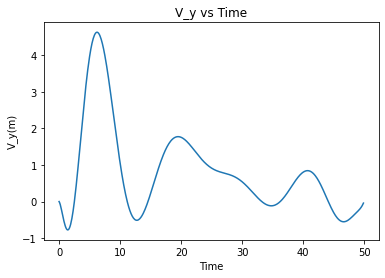

In [49]:
time = []
for i in np.arange(bot.t0,bot.tf,bot.dt):
    time.append(i)
plt.plot(time,bot.ydot)
plt.xlabel("Time")
plt.ylabel("V_y(m)")
plt.title("V_y vs Time")

# Lower order - 3

In [78]:
from sympy import diff, symbols,integrate

def get_bernstein_poly_sym():
    
    to,t,tf= symbols('to t tf')
    
    B0= (1 - (t - to)/(-to + tf))**3
    B1=(3*(t - to)*(1 - (t - to)/(-to + tf))**2)/(-to + tf)
    B2= (3*(t - to)**2*(1 - (t - to)/(-to + tf)))/(-to + tf)**2
    B3= (t - to)**3/(-to + tf)**3
    
    return B0,B1,B2,B3,t,to,tf

def get_bernstein_differentials_sym(B0,B1,B2,B3,t,to,tf):
    
    Bdot0= diff(B0,t)
    Bdot1= diff(B1,t)
    Bdot2= diff(B2,t)
    Bdot3= diff(B3,t)
    
    return Bdot0,Bdot1,Bdot2,Bdot3

def get_product_functions( x0,x1,x2,x3,tinit,tnow,tfinal):
    B0,B1,B2,B3,t,to,tf = get_bernstein_poly_sym()
    Bdot0,Bdot1,Bdot2,Bdot3 = get_bernstein_differentials_sym(B0,B1,B2,B3,t,to,tf)
    
    k = x0*Bdot0 + x1*Bdot1 + x2*Bdot2 + x3*Bdot3
    c0dot = (k*B0).subs([(to, tinit), (tf, tfinal)]) 
    c1dot = (k*B1).subs([(to, tinit), (tf, tfinal)]) 
    c2dot = (k*B2).subs([(to, tinit), (tf, tfinal)]) 
    c3dot = (k*B3).subs([(to, tinit), (tf, tfinal)])

    c0 = integrate(c0dot,t).subs([(t, tnow)]) - integrate(c0dot,t).subs([(t, tinit)]) 
    c1 = integrate(c1dot,t).subs([(t, tnow)]) - integrate(c1dot,t).subs([(t, tinit)]) 
    c2 = integrate(c2dot,t).subs([(t, tnow)]) - integrate(c2dot,t).subs([(t, tinit)]) 
    c3 = integrate(c3dot,t).subs([(t, tnow)]) - integrate(c3dot,t).subs([(t, tinit)]) 
    
    return c0,c1,c2,c3

def get_bernstein_poly(tinit,tnow,tfinal):
    B0,B1,B2,B3,t,to,tf = get_bernstein_poly_sym()
    
    b0= B0.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b1= B1.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b2= B2.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b3= B3.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    
    return b0,b1,b2,b3

def get_bernstein_differentials(tinit,tnow,tfinal):
    B0,B1,B2,B3,t,to,tf = get_bernstein_poly_sym()
    Bdot0,Bdot1,Bdot2,Bdot3 = get_bernstein_differentials_sym(B0,B1,B2,B3,t,to,tf)
    
    b0= Bdot0.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b1= Bdot1.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b2= Bdot2.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 
    b3= Bdot3.subs([(to, tinit),(t, tnow), (tf, tfinal)]) 

    return b0,b1,b2,b3

In [79]:
def get_wx(xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Btw3 = np.asarray(get_bernstein_poly(to,tw3,tf))
    Bdottw3 = np.asarray(get_bernstein_differentials(to,tw3,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    B = np.array([[Btw1[1], Btw1[2]],
                 [Bdotto[1], Bdotto[2]],
                 [Bdottf[1], Bdottf[2]],
                 [Btw2[1], Btw2[2]],
                 [Btw3[1], Btw3[2]],
                 [Bdottw1[1], Bdottw1[2]],
                 [Bdottw2[1], Bdottw2[2]],
                 [Bdottw3[1], Bdottw3[2]]])
    
    A = np.array([[xw1 - xo*Btw1[0] - xf*Btw1[3]],
                 [xdoto - xo*Bdotto[0] - xf*Bdotto[3]],
                 [xdotf - xo*Bdottf[0] - xf*Bdottf[3]],
                 [xw2 - xo*Btw2[0] - xf*Btw2[3]],
                 [xw3 - xo*Btw3[0] - xf*Btw3[3]],
                 [xdotw1 - xo*Bdottw1[0] - xf*Bdottw1[3]],
                 [xdotw2 - xo*Bdottw2[0] - xf*Bdottw2[3]],
                 [xdotw3 - xo*Bdottw3[0] - xf*Bdottw3[3]]])
    
    #In get coefficient function these coefficients are taken as x0,x1,x2,x3,x4,x5
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    W0 = xo
    Wf = xf
    W1 = W[0,0]
    W2 = W[1,0]
    
    return W0,W1,W2,Wf

def get_wk(yo, yw1,yw2,yw3,yf, ko,kw1,kw2,kw3, kf,\
           kdoto, kdotf, xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf):
    
    Btw1 = np.asarray(get_bernstein_poly(to,tw1,tf))
    Bdottw1 = np.asarray(get_bernstein_differentials(to,tw1,tf))
    
    Btw2 = np.asarray(get_bernstein_poly(to,tw2,tf))
    Bdottw2 = np.asarray(get_bernstein_differentials(to,tw2,tf))
    
    Btw3 = np.asarray(get_bernstein_poly(to,tw3,tf))
    Bdottw3 = np.asarray(get_bernstein_differentials(to,tw3,tf))
    
    Bto = np.asarray(get_bernstein_poly(to,to,tf))
    Bdotto = np.asarray(get_bernstein_differentials(to,to,tf))
    
    Btf = np.asarray(get_bernstein_poly(to,tf,tf))
    Bdottf = np.asarray(get_bernstein_differentials(to,tf,tf))
    
    x0,x1,x2,x3 = get_wx(xo, xw1,xw2,xw3, xf, xdoto, xdotw1,xdotw2,xdotw3, xdotf, to, tw1,tw2,tw3, tf)
    
    coefftw1 = np.asarray(get_product_functions( x0,x1,x2,x3,to,tw1,tf ))
    coefftw2 = np.asarray(get_product_functions( x0,x1,x2,x3,to,tw2,tf ))
    coefftw3 = np.asarray(get_product_functions( x0,x1,x2,x3,to,tw3,tf ))
    
    
    coefftf = np.asarray(get_product_functions( x0,x1,x2,x3,to,tf,tf ))
    coeffto = np.asarray(get_product_functions( x0,x1,x2,x3,to,to,tf ))
    
    B = np.array([[Btw3[1], Btw3[2]],
                 [Btw2[1], Btw2[2]],
                 [Btw1[1], Btw1[2]],
                 [Bdotto[1], Bdotto[2]],
                 [coefftw3[1], coefftw3[2]],
                 [coefftw2[1], coefftw2[2]],
                 [Bdottf[1], Bdottf[2]],
                 [coefftf[1], coefftf[2]],
                 [coefftw1[1], coefftw1[2]],
                 [coeffto[1], coeffto[2]]])
    
    A = np.array([[kw3 - ko*Btw3[0] - kf*Btw3[3]],
                 [kw2 - ko*Btw2[0] - kf*Btw2[3]],
                 [kw1 - ko*Btw1[0] - kf*Btw1[3]],
                 [kdoto - ko*Bdotto[0] - kf*Bdotto[3]],
                 [yw3 - ko*coefftw3[0] - kf*coefftw3[3] - yo],
                 [yw2 - ko*coefftw2[0] - kf*coefftw2[3] - yo],
                 [kdotf - ko*Bdottf[0] - kf*Bdottf[3]],
                 [yf - ko*coefftf[0] - kf*coefftf[3] - yo],
                 [yw1 - ko*coefftw1[0] - kf*coefftw1[3] - yo],
                 [yo - ko*coeffto[0] - kf*coeffto[3] - yo]])
    
    W = np.linalg.pinv((B.astype(float)))@(A.astype(float))
    
    k0 = ko
    k3 = kf
    k1 = W[0,0]
    k2 = W[1,0]
    
    
    return k0,k1,k2,k3

In [80]:
class agent:
    def __init__(self,rad,tf,tw1,tw2,tw3,start,waypt1,waypt2,waypt3,\
                 goal,init_or,final_or,waypt1_or,waypt2_or,waypt3_or):
        
        self.init_or = init_or #initial orientation
        self.final_or = final_or #final orientation
        self.waypt1_or = waypt1_or #initial orientation
        self.waypt2_or = waypt2_or #final orientation
        self.waypt3_or = waypt3_or #final orientation
        
        self.xdoto=0 #initial velocity 
        self.xdotf=0 #final velocity
        
        self.xdotw1=0 #waypoint velocity #I ADDED
        self.xdotw2=0 #waypoint velocity #I ADDED
        self.xdotw3=0 #waypoint velocity #I ADDED
        
        
        self.k0=np.tan(self.init_or)   # tangent of the initial heading angle of the robot
        self.kdot0=0 # differntial of the tangent of the initial heading angle of the robot
        
        self.kw1=np.tan(self.waypt1_or)   # tangent of the initial heading angle of the robot
        self.kw2=np.tan(self.waypt2_or)   # tangent of the initial heading angle of the robot
        self.kw3=np.tan(self.waypt3_or)   # tangent of the initial heading angle of the robot
        
        self.kf=np.tan(self.final_or)     #  tangent of the final heading angle of the robot
        self.kdotf=0  # differntial of the tangent of the final heading angle of the robot
        self.rad = rad # Radius of Robot
        self.t0 = 0 #time start
        self.tf = tf #time final
        self.tw1 = tw1 #time waypoint
        self.tw2 = tw2 #time waypoint
        self.tw3 = tw3 #time waypoint
        self.pos = copy.deepcopy(start) #holds current position [xp, yp]
        self.x = [] #holds x values
        self.y = [] #holds y values
        self.xdot = [] #holds x velocities
        self.ydot = [] #holds y velocities
        self.goal = goal #[xg, yg]
        self.origin = start #[xs, ys]
        self.waypt1 = waypt1 #[xw, yw]
        self.waypt2 = waypt2 #[xw, yw]
        self.waypt3 = waypt3 #[xw, yw]
        self.xf = self.goal[0] #final x
        self.yf = self.goal[1] #final y
        
        self.dt = 0.1

    def get_overall_traj(self):
        x0, x1, x2, x3 = get_wx(self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0],\
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0, \
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        k0, k1, k2, k3 = get_wk(self.origin[1], self.waypt1[1],self.waypt2[1],self.waypt3[1],self.goal[1], \
                                        self.k0,self.kw1,self.kw2,self.kw3,self.kf, self.kdot0, self.kdotf, \
                                        self.origin[0], self.waypt1[0],self.waypt2[0],self.waypt3[0],self.goal[0], \
                                        self.xdoto, self.xdotw1,self.xdotw2,self.xdotw3, self.xdotf, self.t0,\
                                        self.tw1,self.tw2,self.tw3, self.tf)
        
        for t in np.arange(self.t0,self.tf,self.dt):
            t = round(t,1)            
            B = np.asarray(get_bernstein_poly(self.t0,t,self.tf))
            Bdot = np.asarray(get_bernstein_differentials(self.t0,t,self.tf))
            coeff = np.asarray(get_product_functions( x0,x1,x2,x3,self.t0,t,self.tf ))
            x = B[0]*x0 + B[1]*x1 + B[2]*x2 + B[3]*x3 
            xdot = Bdot[0]*x0 + Bdot[1]*x1 + Bdot[2]*x2 + Bdot[3]*x3 
            k = B[0]*k0 + B[1]*k1 + B[2]*k2 + B[3]*k3 
            kdot = Bdot[0]*k0 + Bdot[1]*k1 + Bdot[2]*k2 + Bdot[3]*k3 
            y = self.origin[1] + k0 * coeff[0] + k1 * coeff[1] + k2 * coeff[2] + k3 * coeff[3] 
            ydot = xdot*k
            
            self.x.append(x)
            self.y.append(y)
            self.xdot.append(xdot)
            self.ydot.append(ydot)
            self.pos[0] = x
            self.pos[1] = y
            self.visualize_traj(t)
        

    
    
    def visualize_traj(self,time):
        """
        Function to visualize robot trajectory at a given timestamp. 
        Saves snapshots to /data folder as snap0.png, snap1.png...
        String the snapshots using the bash script mkmovie.sh to generate simulation video.
        """
        figure = plt.figure()
        ax = figure.add_subplot(1,1,1)
        robot = matplotlib.patches.Circle(
            (self.pos[0],self.pos[1]),
            radius = self.rad,
            edgecolor='black',
            linewidth=1.0,
            ls='solid',
            alpha=1,
            zorder=2)
        ax.add_patch(robot)
        name = 'data/snap%s.png'%str(int(10*time))
        ax.plot([self.goal[0]], [self.goal[1]], '*', color="red", markersize =15,linewidth=3.0)
        ax.plot([self.waypt1[0]], [self.waypt1[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt2[0]], [self.waypt2[1]], '*', color="green", markersize =15,linewidth=3.0)
        ax.plot([self.waypt3[0]], [self.waypt3[1]], '*', color="green", markersize =15,linewidth=3.0)
        
        
        ax.plot(self.x,self.y,"b--")
        ax.set_aspect('equal')
        ax.set_xlim(-10.0, 60.0)
        ax.set_ylim(-10.0, 60.0)
        ax.set_xlabel(r'$x (m)$')
        ax.set_ylabel(r'$y (m)$')
        ax.grid(True)
        plt.savefig(name, dpi = 200)
        plt.cla()
        plt.close(figure)
        return figure

In [81]:
#Example
bot = agent(2,50,10,25,40,[0,0],[5,40],[25,40],[35,40],[40,40],0,0,np.pi/4,0,0) #try with various parameters
bot.get_overall_traj()